# ИССЛЕДОВАНИЕ ОБЪЯВЛЕНИЙ О ПРОДАЖЕ КВАРТИР

Входные данные для исследования — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Объявления содержат следующую информацию: цена, дата публикации, общая и жилая площадь, площадь кухни, этаж, этажность дома, наличие балкона, высота потолков, удаленность от центра, наличие парков и водоемов и т.д. Задача — установить параметры для определения рыночной стоимости объекта недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.  

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Параметры-исследования" data-toc-modified-id="Параметры-исследования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Параметры исследования</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры</a></span></li><li><span><a href="#Исследование-объявлений-по-их-количеству" data-toc-modified-id="Исследование-объявлений-по-их-количеству-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование объявлений по их количеству</a></span></li><li><span><a href="#Исследование-квартир-в-Санкт-Петербурге" data-toc-modified-id="Исследование-квартир-в-Санкт-Петербурге-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Исследование квартир в Санкт-Петербурге</a></span></li><li><span><a href="#Исследование-сегмента-квартир-в-центре" data-toc-modified-id="Исследование-сегмента-квартир-в-центре-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Исследование сегмента квартир в центре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
#Отключаем предупреждения 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Импортируем библиотеку MatPlot для построения графиков
import matplotlib
import matplotlib.pyplot as plt
#Импортируем библиотеку pandas
import pandas as pd

In [4]:
# посмотрим, что из себя представляет таблица с данными
estate_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Таблица содержит 22 столбца с различной иформацией об объекте недвижимости: цена, метраж, георграфическое расположение и т.д. Чтобы работать с данными, нужно их очистить от пропусков, привести к нужным форматом, выполним это на этапе предобработки данных.

## Предобработка данных

На данном этапе проверим наличие дубликатов и удалим их, рассмотрим пропущенные значения и примем решение, что с ними делать.

In [5]:
#Посчитаем количество дупликатов с помощью метода duplicated
estate_data.duplicated().sum()

0

In [6]:
#Посчитаем количество пропусков с помощью метода isnull
estate_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенных значений очень много, какие-то из них важны, какие-то можно отбросить, будем разбираться поочередно. Перввый столбец с пропущенными значениями высота потолка, посмотрим, какие значения там встречаются 

In [7]:
#С помощью метода describe() выведем числовое описание столбца(посмотрим min, max значения, среднее и медиану)
estate_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Заменим пропущенные значения средним значением.

In [8]:
#Заменяем пропущенные значения с помощью метода fillna() на округленное медианное значение
estate_data['ceiling_height'] = round(estate_data['ceiling_height'].fillna(estate_data['ceiling_height'].median()), 2)
print(estate_data['ceiling_height'].head(5))

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
Name: ceiling_height, dtype: float64


Пропуски в столбцах с общим количеством этажей в доме и названием населенного пункта составляют менее 1%, оставим их без изменений. Далее идет общая жилая площадь, эта величина зависит от количества комнат, можно заполнить пропуски медианным значением для каждого количества.

In [9]:
#Сгруппируем данные по количеству комнат и заполним жилую площадь медианным значением для каждого количества.
#Посмотрим соответствие количества комнат и общей жилой площади, выведем на экран первые 5 строк.
estate_data['living_area'] = estate_data.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median())).round()
display(estate_data[['rooms', 'living_area']].head(5))

,rooms,living_area
0,3,51.0
1,1,19.0
2,2,34.0
3,3,45.0
4,2,32.0


In [10]:
#Посмотрим соответствие количества комнат и общей жилой площади, выведем на экран первые 5 строк.
estate_data.groupby('living_area')['total_area'].median().head(10).reset_index()

,living_area,total_area
0,2.0,37.500
1,3.0,90.000
2,5.0,49.800
3,6.0,32.000
4,8.0,37.000
5,9.0,33.260
6,10.0,35.575
7,11.0,33.950
8,12.0,38.550
9,13.0,34.820


Заметим, что в таблице присутствуют квартиры с жилой площадью 2-9 квадратных метров, даже если брать в расчет квартиры-студии и апартаменты, то предположим, что они должны быть не мнеьше 10 квадратных метров. Уберем эти выбросы из данных.

In [11]:
#Посмотрим последние значение этой же таблицы
estate_data.groupby('living_area')['total_area'].median().tail(10).reset_index()

,living_area,total_area
0,274.0,491.0
1,280.0,460.8
2,300.0,402.0
3,302.0,507.0
4,312.0,483.9
5,322.0,631.2
6,332.0,517.0
7,348.0,495.0
8,409.0,590.0
9,410.0,900.0


Максимальные значения жилой площади выглядят правдоподобно и соответствуют общей площади квартиры.

In [12]:
#Сделаем срез данных с помощью метода query() по столбцу с жилой площадью больше 10 квадратных метров
estate_data = estate_data.query('living_area >= 10')

В большинстве строк не указано, является ли квартира апартаментами, предположим, что эту информацию можно оставить не заполненной.


Площадь кухни заполним медианным значением.

In [13]:
#Используя метод fillna() заменяем пропущенные значения на значения медианы по всем данным, и проверяем, что пропусков не осталось
estate_data['kitchen_area'] = round(estate_data['kitchen_area'].fillna(estate_data['kitchen_area'].median()), 2)
estate_data['kitchen_area'].isnull().sum()

0

Посмотрим, как соотносится площадь кухни с общей площадью.

In [14]:
#Сгруппируем данные по площади кухни и выведем среднее значение общей площади
estate_data.groupby('kitchen_area')['total_area'].mean().head(10).reset_index()

,kitchen_area,total_area
0,1.30,28.500000
1,2.00,23.712857
2,2.30,34.700000
3,2.40,18.400000
4,2.89,66.400000
5,3.00,23.827143
6,3.20,43.000000
7,3.30,45.000000
8,3.40,44.400000
9,3.50,46.300000


Проверим максимальные площади кухни.

In [15]:
#Выведем из той же таблици 10 последних значений
estate_data.groupby('kitchen_area')['total_area'].mean().tail(10).reset_index()

,kitchen_area,total_area
0,72.0,145.0
1,75.0,150.0
2,77.0,195.0
3,87.2,177.9
4,93.0,146.0
5,93.2,181.1
6,100.0,590.0
7,100.7,255.0
8,107.0,249.7
9,112.0,900.0


Здесь мы так же наблюдаем наличие очень маленьких значений, но предположим, что для квартиры-студии кухонная зона может быть такой в составе общей площади. Посчитем, сколько таких значений, предположим, что минимальный размер кухни - 5 квадратных метров.
Максимальные площади выглядят правдоподобно и соответствуют общей площади квартир.

In [16]:
#Сделаем срез данных по площади кухни меньшей 5 квадратных метров и посчитаем количество таких объявлений
kitchen_min = estate_data.query('kitchen_area < 5')
kitchen_min['kitchen_area'].count()

105

Всего 105 объявлений, это меньще 1%, поэтому можем убрать эти данные.

In [17]:
#Сделаем срез данных с помощью метода query() по столбцу с площадью кухни больше 5 квадратных метров
estate_data = estate_data.query('kitchen_area >= 5')

Очень много пропусков в столбце с числом балконов, вероятнее всего их просто нет, поэтому заполним эти пропуски нулями.

In [18]:
#Используем метод fillna(), чтобы заполнить пропуски, проверим, что пропусков не осталось
estate_data['balcony'] = estate_data['balcony'].fillna(0)
estate_data['balcony'].isnull().sum()

0

Обработаем пропуски в столбце с количеством дней продажи: мы не можем это предугадать, поэтому заполним пропуски на нули.

In [19]:
#Используем метод fillna(), чтобы заполнить пропуски, проверим, что пропусков не осталось
estate_data['days_exposition'] = estate_data['days_exposition'].fillna(0)
estate_data['days_exposition'].isnull().sum()

0

Пропуски в столбцах о наличии по близости парков и водоемов скорее всего говорят об их отсутствии, поэтому заменим их так же на нули.

In [20]:
#Используем метод fillna(), чтобы заполнить пропуски, проверим, что пропусков не осталось
estate_data['ponds_around3000'] = estate_data['ponds_around3000'].fillna(0)
estate_data['parks_around3000'] = estate_data['parks_around3000'].fillna(0)
estate_data[['ponds_around3000', 'parks_around3000']].isnull().sum()

ponds_around3000    0
parks_around3000    0
dtype: int64

Остальные пропуски, такие как близость к аэропорту или расстояние до центра, мы вряд ли сможем заполнить какими-то значениями, поэтому оставим эти значения пустыми, иначе это может оказать сильное влияние на распределение значений. Эти графы либо не заполнили вовсе либо, например, водоем отсутствует и поэтому не указали никакого значения.

Посмотрим типы данных значений в каждом столбце.

In [21]:
#Вызовем метод dtypes для получения информации о типах данных в таблице
estate_data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Число балконов, количество дней размещения, число водоемов и парков - это все целые значения, нужно заменить тип данных float на int, дата публикации должна быть в формате datetime, а столбец "is_apartament" должен быть в булевом типе. Выполним эти преобразования.

In [22]:
#Меняем типы данных с помощью метода values.astype, выводом проверим правильность выполнения
estate_data[['balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000']] = (
estate_data[['balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000']].values.astype(int)
)

estate_data['is_apartment'] = estate_data['is_apartment'].values.astype(bool)

estate_data['first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'],
                                                    format='%Y.%m.%dT%H:%M:%S')

estate_data[['balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000', 
             'is_apartment', 'first_day_exposition']].dtypes

balcony                          int64
days_exposition                  int64
parks_around3000                 int64
ponds_around3000                 int64
is_apartment                      bool
first_day_exposition    datetime64[ns]
dtype: object

### Вывод

На этапе предобработки мы убедились, что таблица не содержит дубликатов, провели работу с пропусками, изменили тип данных некоторых столбцов. Часто пропуски в метраже могут быть вызваны тем, что квартира со свободной планировкой и будущий владелец сам будет определять размеры комнат.

## Рассчёты и добавление результатов в таблицу

Рассмотрим столбец с общей стоимостью квартиры.

In [23]:
#Выведем на экран описние значений столбца
estate_data['last_price'].describe()

count    2.357000e+04
mean     6.555550e+06
std      1.090684e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Отметим, что минимальная цена 12190 и максимальная цена 763000000 выглядят как выбросы.

Оценим разброс данных по гистограмме.

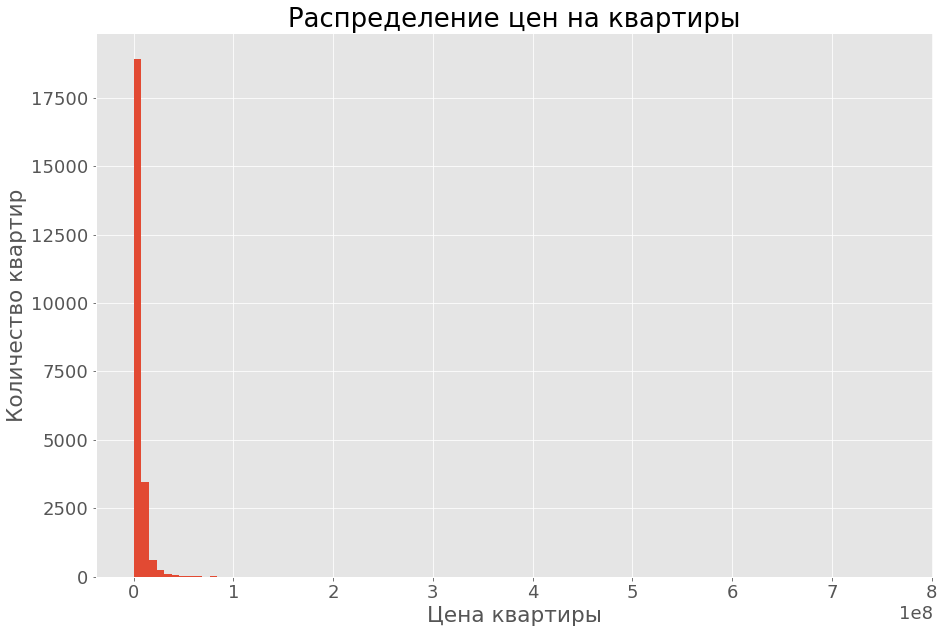

In [24]:
#Построим гистограмму по столбцу с ценой методом hist()
matplotlib.style.use('ggplot') # импортируем библиотеку ggplot
plt.rcParams.update({'font.size': 18}) # размер шрифта на графике
plt.rcParams["figure.figsize"] = (15,10) # размеры графика
estate_data.hist('last_price', bins=100)
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Цена квартиры') # название оси абцисс
plt.title('Распределение цен на квартиры') # заголовок графика
plt.show()

In [25]:
#Посмотрим, последние минимальные значения
price_min = estate_data.sort_values(by='last_price', ascending=False)
price_min['last_price'].tail(10).to_frame()

,last_price
23484,470000.0
18867,470000.0
16219,450000.0
17676,450000.0
5698,450000.0
9581,450000.0
16274,440000.0
14911,430000.0
17456,430000.0
8793,12190.0


Удалим выбросы из данных, удалим минимальное значение 1290 и "отрежем" верхние выбивающиеся значения, ограничим цену в 40 млн.

In [26]:
#С помощью метода query() исключим из столбца с ценой выбивающиеся данные 
estate_data = estate_data.query('12190 < last_price < 40000000 ')

В данных отсутствует такой важный параметр как цена за квадратный метр, риелторы обычно используют его, посчитаем его и добавим в таблицу.

In [27]:
#Добавим новый столбец price_per_square_meter, получим его значение разделив цену на общую площадь
#Выведем первые 5 значений этого столбца на экран
estate_data['price_per_square_meter'] = (estate_data['last_price'] / estate_data['total_area']).round()
estate_data['price_per_square_meter'].head(5).to_frame()

,price_per_square_meter
0,120370.0
1,82921.0
2,92786.0
4,100000.0
5,95066.0


Добавим в таблицу день недели, месяц и год публикации объявлений, чтобы провести анализ о частоте публикаций в зависимости от дня недели, времени года.

In [28]:
#Добавим в таблицу новый столбец weekday, содержащий день недели, с помощью метода dt.weekday
#Выведем первые 10 значений этого столбца на экран
estate_data['weekday'] = estate_data['first_day_exposition'].dt.weekday
estate_data['weekday'].head(10).to_frame()

,weekday
0,3
1,1
2,3
4,1
5,0
6,3
7,3
8,2
9,6
10,3


Привычнее обозначать дни недели словами, а не цифрами, заменим значения с помощью словаря.

In [29]:
#Создадим словарь где ключу с числовым значением будет соответствовать название дня недели и сделаем замену
weekday_dict = ({
     0 : 'понедельник',
     1 : 'вторник',
     2 : 'среда',
     3 : 'четверг',
     4 : 'пятница',
     5 : 'суббота',
     6 : 'воскресенье'
})
estate_data['weekday'].replace(weekday_dict, inplace=True)
estate_data['weekday'].head(5).to_frame()

,weekday
0,четверг
1,вторник
2,четверг
4,вторник
5,понедельник


In [30]:
#Добавим в таблицу новый столбец month с месяцем публикации с помощью метода dt.month
estate_data['month'] = estate_data['first_day_exposition'].dt.month
estate_data['month'].head(5).to_frame()

,month
0,3
1,12
2,8
4,6
5,9


Посчитаем для каждого месяца публикации среднюю стоимость квартиры.

In [31]:
#С помощью методо groupby() сгруппируем таблицу по месяцам и выведем соответствующее округленное значение медианы
estate_data.groupby('month')['price_per_square_meter'].median().round(2).to_frame()

,price_per_square_meter
month,
1,95074.0
2,94794.0
3,95228.0
4,96029.5
5,92683.0
6,92507.0
7,94638.0
8,95647.0
9,95506.0


In [32]:
#Добавим в новый столбец year год публикации  с помощью метода dt.year
estate_data['year'] = estate_data['first_day_exposition'].dt.year
estate_data['year'].head(5).to_frame()

,year
0,2019
1,2018
2,2015
4,2018
5,2018


Для исследования данных нам важна информация об этаже, но ее можно укрупнить - чаще всего люди убирают из своих поисков первый и последний этаж и цены на эти квартиры обычно ниже, выясним это позже, а пока выделим группы по этажу: первый, последний, другой.

In [33]:
#Напишем функцию, которая будет присваивать этаж к группе, 1 - первый, если этаж совпадает с общим количеством этажей - последний,
#иначе - другой. Выведем несколько строк для проверки результата
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
estate_data['floor_group'] = estate_data.apply(floor_group, axis=1)
estate_data['floor_group'].head(5).to_frame()

,floor_group
0,другой
1,первый
2,другой
4,другой
5,другой


Посмотрим, нет ли несоответствий в информации по этажам - проверим, нет ли этажей, которые выше общего числа этажей в доме.

In [34]:
#Посчитаем в цикле, сколько раз выполняется условие, что этаж больше чем всего этажей в доме
i = 0
for row in estate_data:
    if 'floor' > 'floors_total':
        i = i + 1
print(i)

0


Таких данных нет, продалжаем обработку данных.

Посчитаем соотношение жилой и общей площади и соотношение площади кухни к общей. Часто бывает, что квартира с бОльшей площадью имеет меньшую жилую(например, большие коридоры).

In [35]:
#Создадим в таблице новый столбец living_to_total, куда поместим отношение жилой площади к общей
#Выведем описание значений столбца на экран с помощью метода describe()
estate_data['living_to_total'] = (estate_data['living_area'] / estate_data['total_area']).round(2)
estate_data['living_to_total'].describe()

count    23376.000000
mean         0.564084
std          0.109757
min          0.100000
25%          0.490000
50%          0.570000
75%          0.640000
max          1.520000
Name: living_to_total, dtype: float64

Часто указывают в жилую и в общую площадь одно и то же значени, считаем, что такое может быть, а вот жилая пощадь в 2 раза превыщающая общую (максимальное значение - 2) вызывает подозрения. Посмотрим, сколько таких значений.

In [36]:
unreal_area = estate_data.query('(living_area / total_area) > 1')
unreal_area['living_area'].count()

28

Выпадающих значений всего 28. Похоже на ошибки, удалим их из данных.

In [37]:
#С помощью метода query() делаем срез данных по отношению жилой площади к общей не больше 1
estate_data_cut = estate_data.query('(living_area / total_area) <= 1')

In [38]:
#Создадим в таблице новый столбец kitchen_to_total, куда поместим отношение площади кухни к общей
#Выведем описание значений столбца с помощью метода describe()
estate_data['kitchen_to_total'] = (estate_data['kitchen_area'] / estate_data['total_area']).round(2)
estate_data['kitchen_to_total'].describe()

count    23376.000000
mean         0.189875
std          0.074830
min          0.020000
25%          0.130000
50%          0.170000
75%          0.240000
max          0.790000
Name: kitchen_to_total, dtype: float64

Как и можно было предположить, кухня занимает не более четверти площади квартиры, но наблюдаем неномральное максимальное значение, вряд ли кухня может занимать 90% всей жил.площади. Этот параметр может подсказать, можно ли считать кухню полноценной комнатой в площади квартиры или же она выполняет только бытовую функцию.

### Вывод

Мы вычислили и добавили новые данные в таблицу, необходимые для дальнейшего анализа. 

## Исследовательский анализ данных

### Параметры исследования

Изучим площадь, цену, число комнат и высоту потолков. Построим гистограммы для этих данных.

In [39]:
#Вызовем метод describe, чтобы оценить значения в столбце с площадью квартиры
estate_data['total_area'].describe()

count    23376.000000
mean        58.994544
std         29.924386
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        470.300000
Name: total_area, dtype: float64

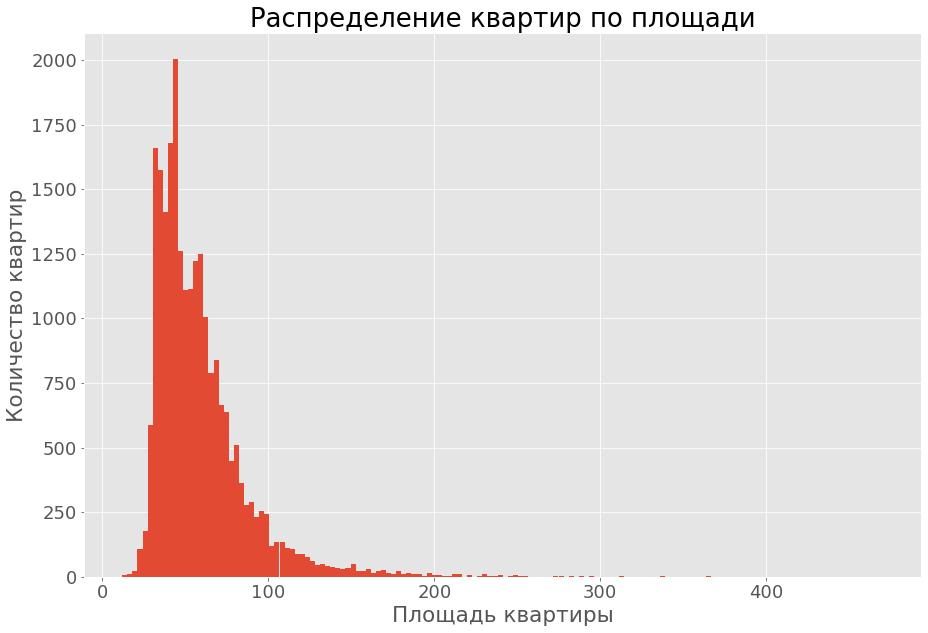

In [40]:
#Построим гистограмму для площади
estate_data.hist('total_area', bins=150)
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Площадь квартиры') # название оси абцисс
plt.title('Распределение квартир по площади') # заголовок графика
plt.show()

Из гистограммы видно, что основной объем рынка складывается из квартир средней площади, мы видим три выступающих пика, что объясняется застройкой городов типовыми сериями домов в советское время. Квартир экстремально-маленькой площади мало, в то время как квартиры большой площади (более 100 квадратных метров) на рынке представлены в большем разнообразии. Все же эти объявления являются выбросами, ограничим общую площадь 20 квадратными метрами снизу и 200 - сверху.

In [41]:
#С помощью метода query() сделаем срез данных по столбцу с общей площадью больше 20 и меньше 200 кв.метров
estate_data = estate_data.query('20 <= total_area <= 200')

In [42]:
#Вызовем метод describe, чтобы оценить цены за квадратный метр
estate_data['price_per_square_meter'].describe()

count     23227.000000
mean      97092.253713
std       38110.550742
min        7963.000000
25%       76398.000000
50%       94737.000000
75%      113462.000000
max      848485.000000
Name: price_per_square_meter, dtype: float64

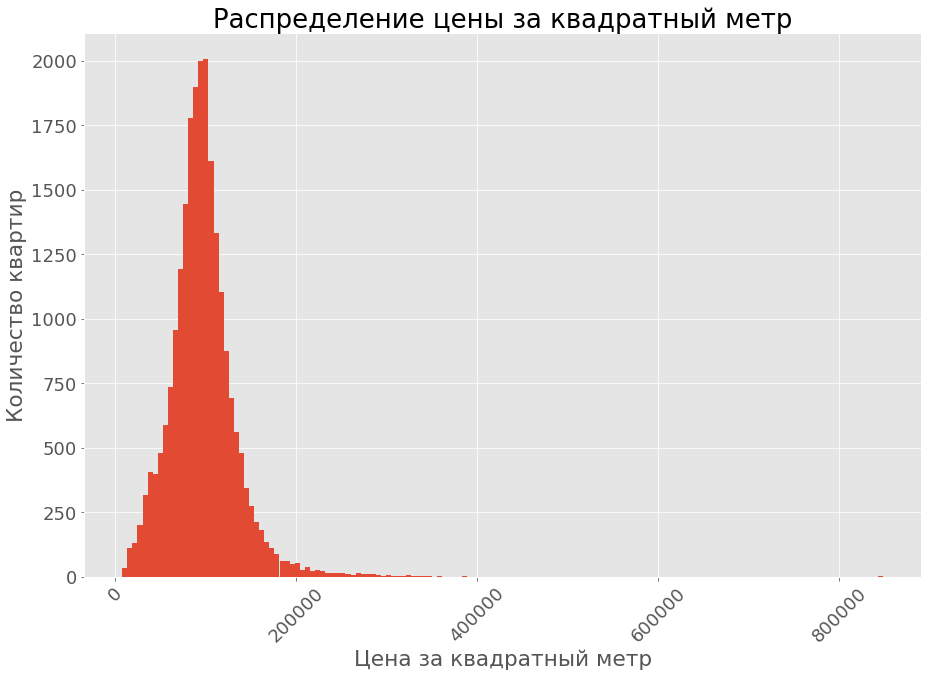

In [43]:
#Построим гистограмму для цены за квадртаный метр
estate_data.hist('price_per_square_meter', bins=150)
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Цена за квадратный метр') # название оси абцисс
plt.title('Распределение цены за квадратный метр') # заголовок графика
plt.xticks(rotation=45)
plt.show()

По гистограмме можем сделать вывод, что средняя цена за квадратный метр по рынку явно выражена, разброс цен относительно этого значения в  можно обусловить разным состонием квартир(в части ремонта, в части юридической чистоты), районом, площадью, этажом, что подробнее будет исследовано ниже.

In [44]:
#Вызовем метод describe, чтобы оценить значения в столбце числа комнат
estate_data['rooms'].describe()

count    23227.000000
mean         2.032893
std          0.992456
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Заметим, что минимальное значение комнат - 0, вероятнее всего - это квартиры-студии, поэтому заменим нулевые значения на 1.

In [45]:
estate_data['rooms'] = estate_data['rooms'].replace(0, 1)
estate_data['rooms'].describe()

count    23227.000000
mean         2.040901
std          0.979976
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

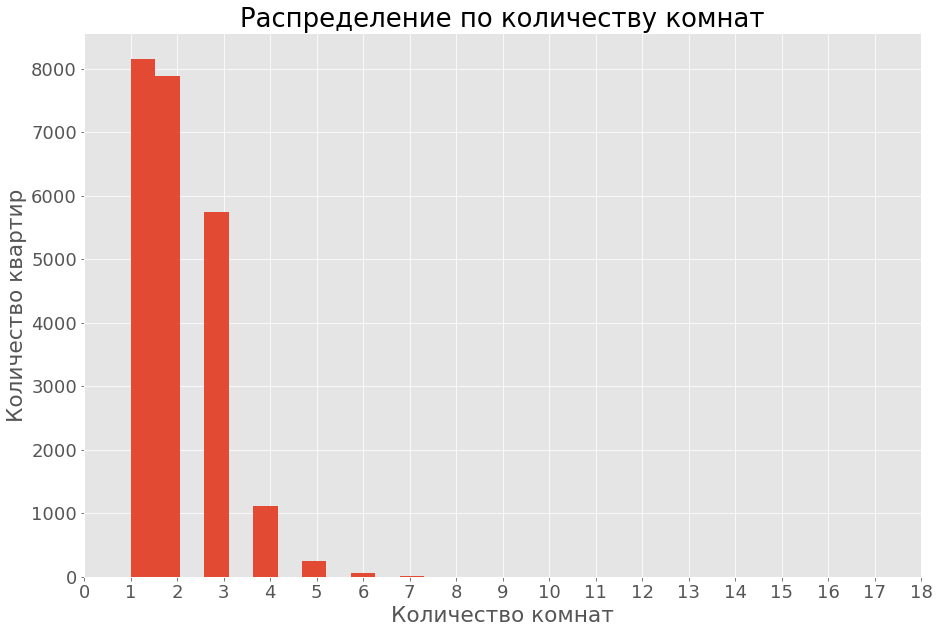

In [46]:
#Построим гистограмму для количества комнат
estate_data.hist('rooms', bins=19)
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Количество комнат') # название оси абцисс
plt.title('Распределение по количеству комнат') # заголовок графика
plt.xticks(range(19))
plt.show()

Наиболее распространены на рынке недвижимости однокомнатные и двухкомнатные квартиры  и немного меньше - трехкомнатные, квартир с четырьмя комнатами и более представлено значительно меньше. Это можно объяснить покупательной способностью населения, большинство покупателей не могут позволить себе приобрести более просторные квартиры из-за их дороговозны.

In [47]:
#Вызовем метод describe, чтобы оценить значения в столбце с высотой потолков
estate_data['ceiling_height'].describe()

count    23227.000000
mean         2.719351
std          0.995021
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

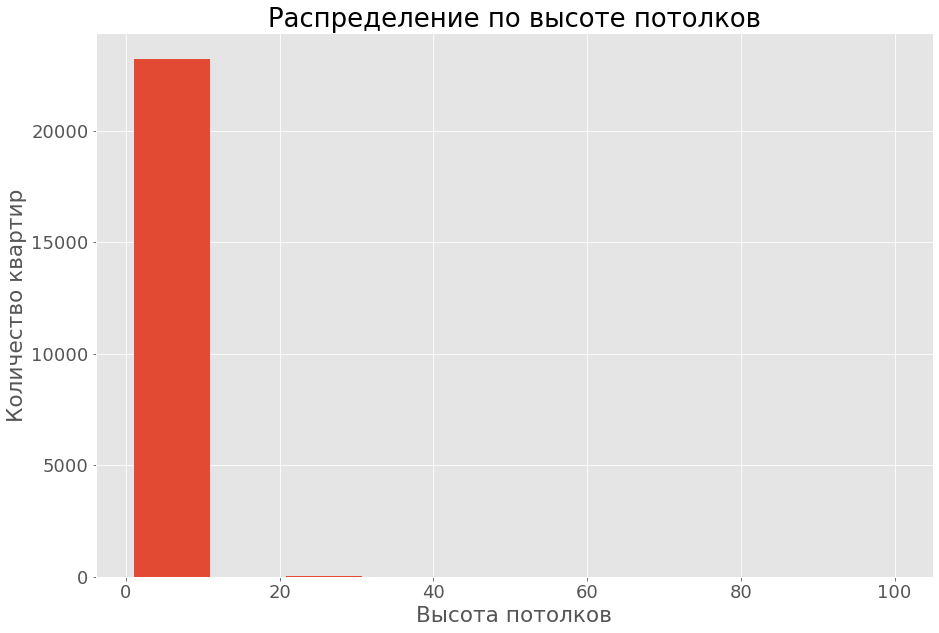

In [48]:
#Построим гистограмму для высоты полотков
estate_data.hist('ceiling_height', bins=10)
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Высота потолков') # название оси абцисс
plt.title('Распределение по высоте потолков') # заголовок графика
plt.show()

По гистограмме видим 2 выраженных пика, они соответствуют типовой застройке города - 2.5-2.64 метра и 3-3.2 метра.

In [49]:
all_heights = estate_data.sort_values(by='ceiling_height', ascending=False)
all_heights['ceiling_height'].unique()

array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   5.8 ,   5.5 ,   5.3 ,
         5.  ,   4.8 ,   4.7 ,   4.5 ,   4.4 ,   4.37,   4.3 ,   4.25,
         4.2 ,   4.19,   4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,
         3.95,   3.93,   3.9 ,   3.88,   3.85,   3.84,   3.83,   3.8 ,
         3.78,   3.75,   3.7 ,   3.68,   3.67,   3.66,   3.65,   3.63,
         3.62,   3.6 ,   3.59,   3.58,   3.57,   3.56,   3.55,   3.54,
         3.53,   3.52,   3.51,   3.5 ,   3.49,   3.48,   3.47,   3.46,
         3.45,   3.44,   3.43,   3.42,   3.4 ,   3.39,   3.38,   3.37,
         3.36,   3.35,   3.34,   3.33,   3.32,   3.31,   3.3 ,   3.29,
         3.28,   3.27,   3.26,   3.25,   3.24,   3.23,   3.22,   3.21,
         3.2 ,   3.18,   3.17,   3.16,   3.15,   3.14,   3.13,   3.12,
         3.11,   3.1 ,   3.09,   3.08,   3.07,   3.06,   3.05,   3.04,
         3.03,   3.02,   3.01,   3.  ,   2.99,   2.98,   2.97,   2.96,
      

Можем заметить, что случаются выбросы, не соответствующие реальности: 100, 32, 27, 1, 2. Минимальная высота потолка - 2.5, 2.64, 2.7 метра, высокие потолки - 3-3.5 метра, но можем предположить, что есть и двухуровненвые квартиры, в которых высота потолка может достигать и 5 метров. В остальных значениях явно допущены ошибки. Уберем из значений не правдоподобные данные.

In [50]:
#Сделаем срез данных по столбцу с нормальной высотой потолка с помощью метода query() и посмотрим, какие значения останутся
estate_data = estate_data.query('2.5 <= ceiling_height <= 5')
estate_data['ceiling_height'].describe()

count    23124.000000
mean         2.692009
std          0.204300
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

Построим гистограмму по новым значениям.

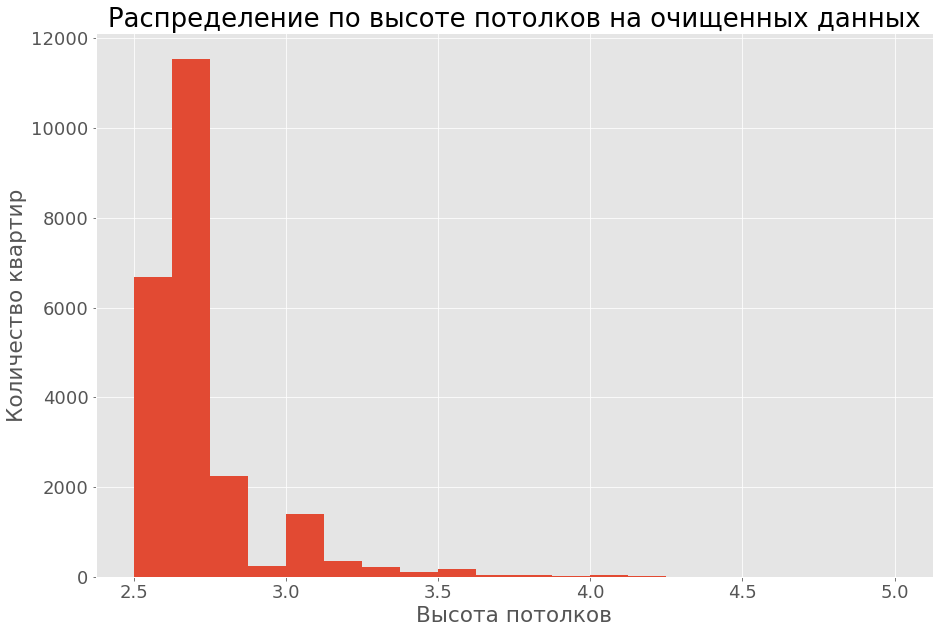

In [51]:
#Вызываем метод hist() для построения гистограммы
estate_data.hist('ceiling_height', bins=20, range=(2.5, 5))
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Высота потолков') # название оси абцисс
plt.title('Распределение по высоте потолков на очищенных данных') # заголовок графика
plt.show()

Теперь можно оценить распределение высоты потолков. Заметим, что потолки от 3 до 3.2 метра лидируют - это старый жилой фонд Санкт-Петербурга: дореволюционные доходные дома, "сталинские" и конструктивистские дома; 2.5-2.7 метра - высота потолков в типовых домах застройки 60-70х годов. Провал между первыми и вторыми значениями объясняется строительством по типовым проектам.

### Время продажи квартиры
Изучим столбец days_exposition, выясним, сколько обычно времени занимает продажа квартиры.

In [52]:
#Выведем информацию по значениям столбца
estate_data['days_exposition'] = estate_data['days_exposition'].values.astype(int)
estate_data['days_exposition'].describe()

count    23124.000000
mean       155.720291
std        212.258670
min          0.000000
25%         23.000000
50%         73.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64

Не смотря на то, что мы поменяли тип данных на целочисленный, там остались какие-то странные значения, с которыми надо разобраться. Количество дней не может быть отрицательным, либо этот минус закрался случайно либо этот какой-то маркер/отметка у конкретного объекта недвижимости. Построим гистограмму и посмотрим, сколько значений меньше 0.

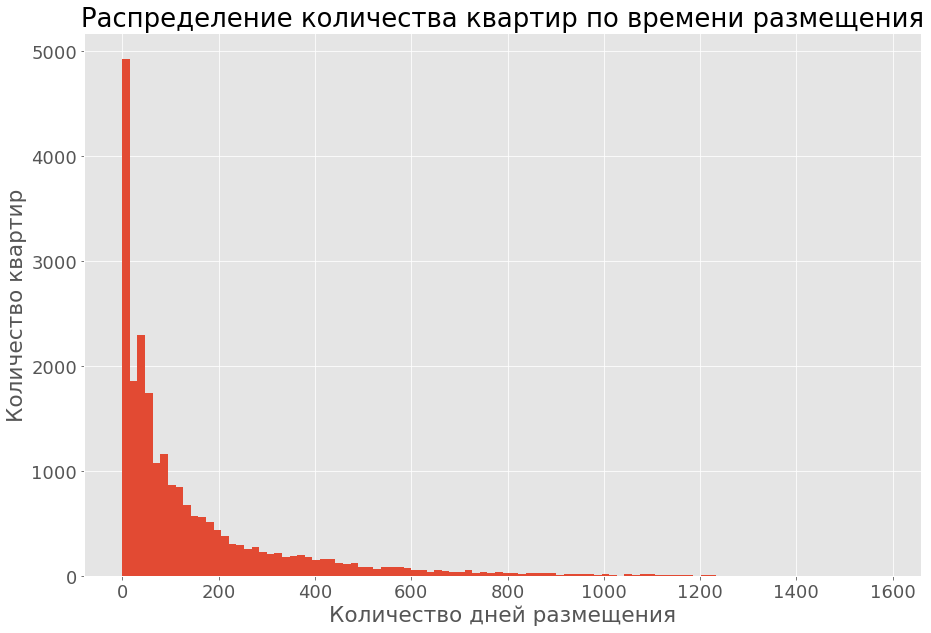

In [53]:
estate_data.hist('days_exposition', bins=100)
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Количество дней размещения') # название оси абцисс
plt.title('Распределение количества квартир по времени размещения') # заголовок графика
plt.show()

По гистограмме виден выраженные пики 1,5-2 месяца, это соответствует действительности, в большинстве своем квартиры в нормальном состоянии и по адекватной цене продаются менее чем за пол года. Есть такие "горячие пирожки", которые покупают за один-два дня, есть и те, которые продаются годами(например, цена слишком завышена, есть проблемы с документами или же это фейковое объявление, которое висит для привлечения внимания). Мы видим, что среднее значение - 156 дней, его мы получили за счет редких, но очень длительных продаж, значение медианы - 95 дней, отраджает реальную ситуацию с продажей квартиры. Будем считать оптимальным продажи от 1 дня до года(~оставим до 400 дней). Сделаем новый срез данных по этим значениям.

In [54]:
estate_data = estate_data.query('1 <= days_exposition <= 400')
estate_data['days_exposition'].describe()

count    17508.000000
mean       111.013822
std         97.751561
min          1.000000
25%         38.000000
50%         77.000000
75%        161.000000
max        400.000000
Name: days_exposition, dtype: float64

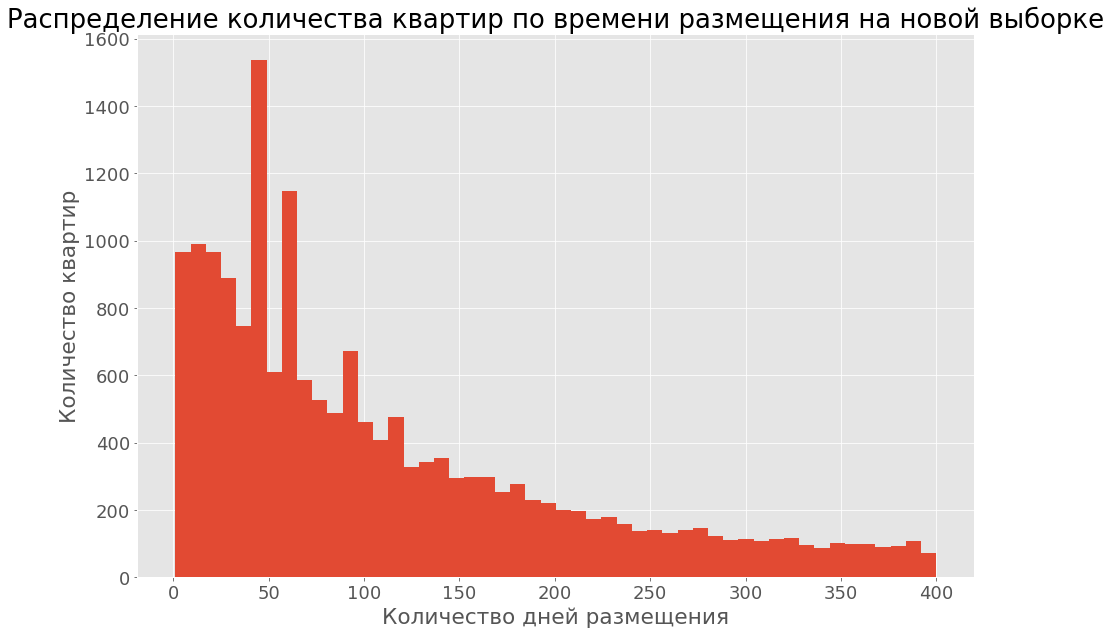

In [55]:
estate_data.hist('days_exposition', bins=50)
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Количество дней размещения') # название оси абцисс
plt.title('Распределение количества квартир по времени размещения на новой выборке') # заголовок графика
plt.show()

Можно сказать, что если квартиру продали за период от 1 дня до 2 месяцев, то продажа прошла быстро. Но все же чаще всего квартиры продаются за 1,5-2 месяца, об этом нам говорят выбивающиеся пики на гистограмме.

### Факторы, влияющие на стоимость квартиры
Исследуем, какие факторы больше всего влияют на стоимость квартиры. Посмотрим как цена зависит от площади квартиры.

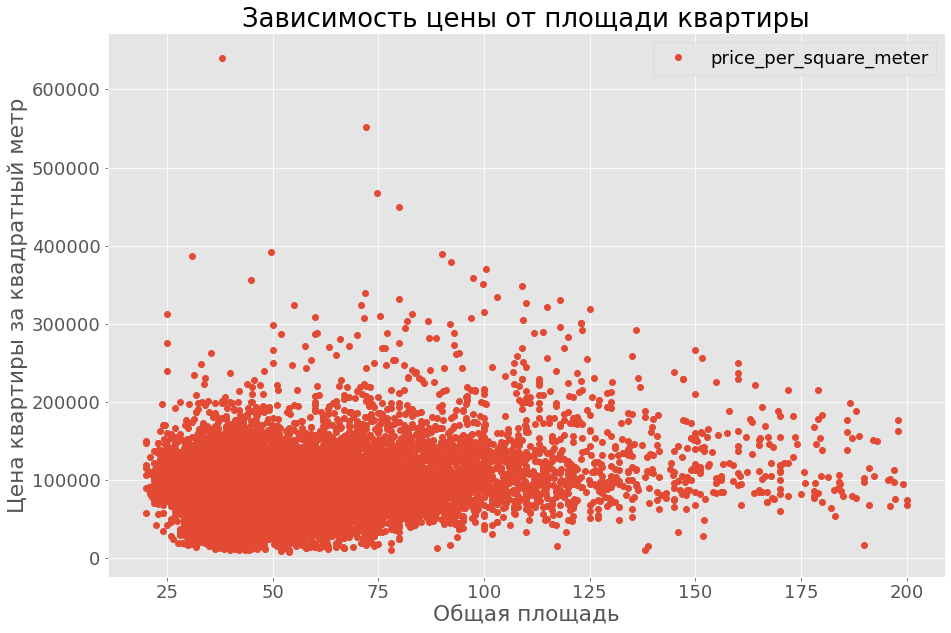

In [56]:
#Построим график зависимости цены от площади квартиры
estate_data.plot(x='total_area', y='price_per_square_meter', style='o', grid=True)
plt.ylabel('Цена квартиры за квадратный метр') # название оси ординат
plt.xlabel('Общая площадь') # название оси абцисс
plt.title('Зависимость цены от площади квартиры') # заголовок графика
plt.show()

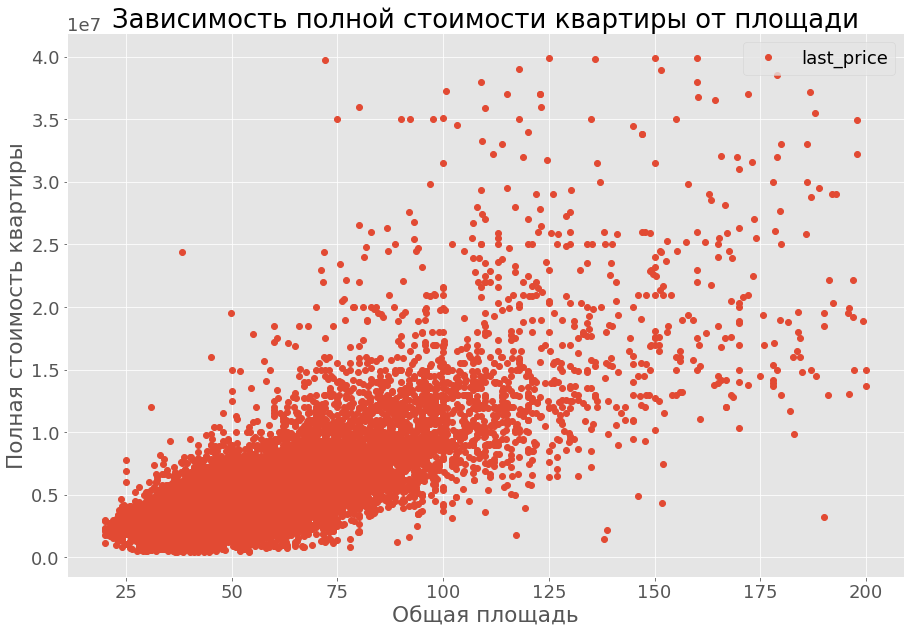

In [57]:
#Построим график зависимости полной стоимости квартиры от площади 
estate_data.plot(x='total_area', y='last_price', style='o', grid=True)
plt.ylabel('Полная стоимость квартиры') # название оси ординат
plt.xlabel('Общая площадь') # название оси абцисс
plt.title('Зависимость полной стоимости квартиры от площади') # заголовок графика
plt.show()

По графику делаем видно, что чем больше площадь - тем больше цена. Есть единичные выбивающиеся значения, но вцелом цена растет по экспоненте при увеличении площади.

In [58]:
# выведем минимальную/максимальную площадь и цену
print('Минимальная площадь: ', estate_data.total_area.min())
print('Максимальная площадь: ', estate_data.total_area.max())
print('Минимальная цена: {} рублей'.format(estate_data.last_price.min()))
print('Максимальная цена: {} рублей'.format(estate_data.last_price.max()))

Минимальная площадь:  20.0
Максимальная площадь:  200.0
Минимальная цена: 430000.0 рублей
Максимальная цена: 39900000.0 рублей


Выведем зависимость цены от числа комнат.

In [59]:
#Сделаем сводную таблицу по числу комнат и соответствующему ему медианному значению цены
rooms_price_pivot = estate_data.groupby('rooms')['price_per_square_meter'].mean().round()
print(rooms_price_pivot)

rooms
1     99734.0
2     93361.0
3     91894.0
4     95943.0
5     96301.0
6    100286.0
7    119210.0
8    116056.0
Name: price_per_square_meter, dtype: float64


19 комнат конечно впечатляет, посмотрим количество объявлений по количеству комнат

In [60]:
#С помощью метода groupby() сгруппируем данные ко количеству комнат и посчитаем количество каждых с помощью метода count()
estate_data.groupby('rooms')['rooms'].count()

rooms
1    6561
2    6022
3    4034
4     705
5     146
6      29
7      10
8       1
Name: rooms, dtype: int64

Количество объявлений о прадаже квартир с 8 комнатами и больше - единицы, считаем это выбросами и удалим их из исследуемых данных.

In [61]:
#С помощью метода query() выполним срез данных для количества комнат меньшего 8, выведем на экран получивщееся количество
estate_data = estate_data.query('rooms < 8')
estate_data.groupby('rooms')['rooms'].count()

rooms
1    6561
2    6022
3    4034
4     705
5     146
6      29
7      10
Name: rooms, dtype: int64

Построим график для этих значений.

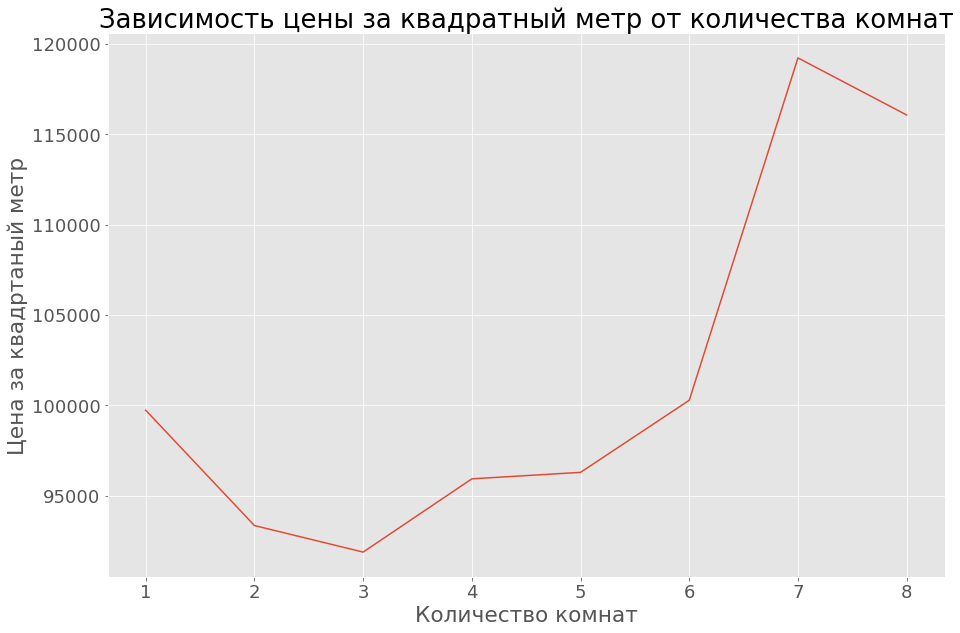

In [62]:
rooms_price_pivot.plot(x='rooms', y='price_per_quatre_meter', grid=True)
plt.ylabel('Цена за квадртаный метр') # название оси ординат
plt.xlabel('Количество комнат') # название оси абцисс
plt.title('Зависимость цены за квадратный метр от количества комнат') # заголовок графика
plt.show()

Посмотрим, какой будет зависимость полной стоимости от количества комнат

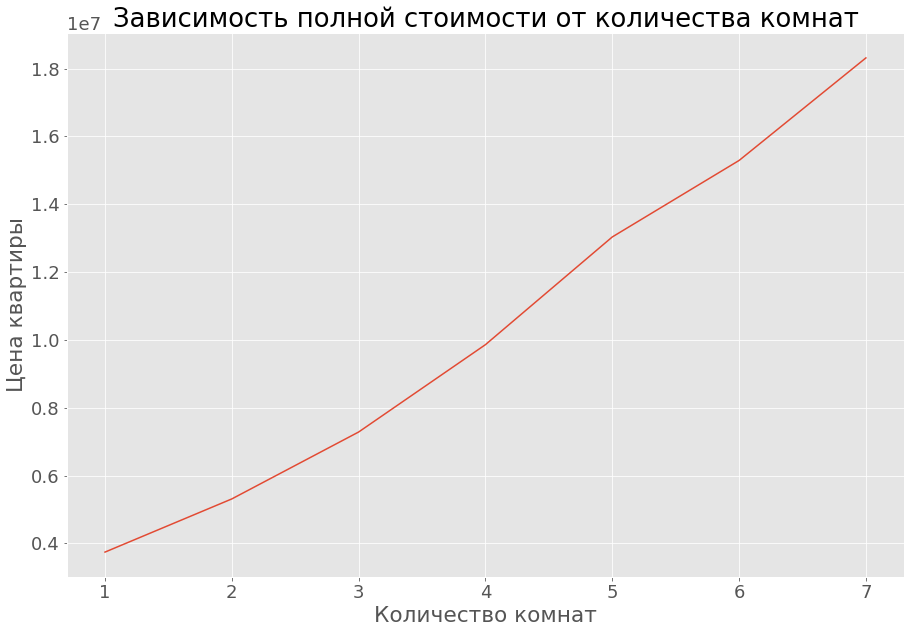

In [63]:
rooms_price_pivot1 = estate_data.groupby('rooms')['last_price'].mean()
rooms_price_pivot1.plot(x='rooms', y='last_price', grid=True)
plt.ylabel('Цена квартиры') # название оси ординат
plt.xlabel('Количество комнат') # название оси абцисс
plt.title('Зависимость полной стоимости от количества комнат') # заголовок графика
plt.show()

По второму графику четко видно, что цена растет при увеличении числа комнат.

Изучим влияние удаленности от центра на цену квадратного метра.

In [64]:
estate_data['cityCenters_nearest'].describe()

count    13481.000000
mean     14570.833024
std       8378.330301
min        208.000000
25%      10087.000000
50%      13347.000000
75%      16472.000000
max      64857.000000
Name: cityCenters_nearest, dtype: float64

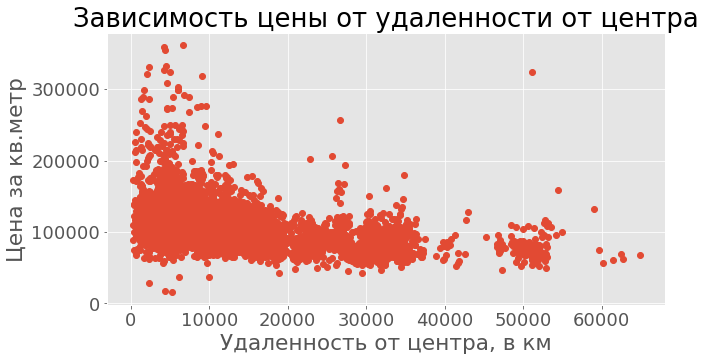

In [65]:
#Построим график зависимости цены от удаленности от центра

#estate_data.plot(y='cityCenters_nearest', x='price_per_square_meter', style='o', figsize=(10,5), grid=True)
price_dist = estate_data.groupby('cityCenters_nearest')['price_per_square_meter'].mean()
price_dist.plot(x='cityCenters_nearest', y='price_per_square_meter', style='o', grid=True, figsize=(10,5))
plt.ylabel('Цена за кв.метр') # название оси ординат
plt.xlabel('Удаленность от центра, в км') # название оси абцисс
plt.title('Зависимость цены от удаленности от центра') # заголовок графика
plt.show()

Чтобы увидеть зависимоть, уберем редкие выпадающие из общего ряда значения цены.

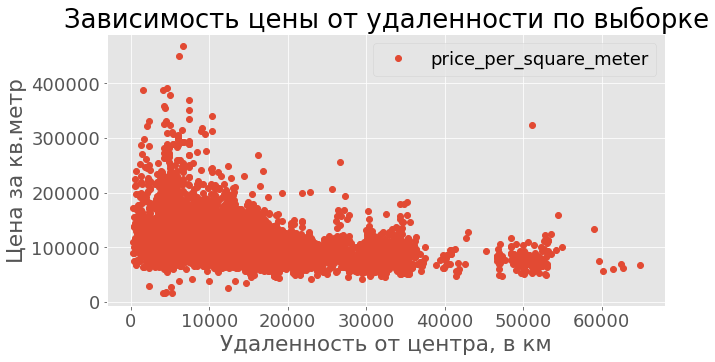

In [66]:
#Сделаем срез данных по цене за квадратный метр
estate_data.query('price_per_square_meter <= 500000').plot(
    x='cityCenters_nearest', y='price_per_square_meter', style='o', grid=True, figsize=(10,5)
)
plt.ylabel('Цена за кв.метр') # название оси ординат
plt.xlabel('Удаленность от центра, в км') # название оси абцисс
plt.title('Зависимость цены от удаленности по выборке') # заголовок графика
plt.show()

Обратим внимание на очевидный тренд увеличения стоимости по мере приближения к центру города.

Рассмотрим зависимость цены от этажа, на котором расположена квартира. Выше мы выделили 3 группы: первый, последний, другой.

In [67]:
#Сделаем сводную таблицу по числу комнат и соответствующему ему медианному значению цены
floor_price_pivot = estate_data.groupby('floor_group')['price_per_square_meter'].median().round()
floor_price_pivot.reset_index()

,floor_group,price_per_square_meter
0,другой,96774.0
1,первый,80307.0
2,последний,87342.0


Из этой таблицы видно, что первый этаж покупают неохотно и цена на него ниже других, последний этаж получше, но все же люди любят жить где-то посередине, на что больше спрос - там выше и цена за квадратный метр.Подтвердим этот вывод графиком.

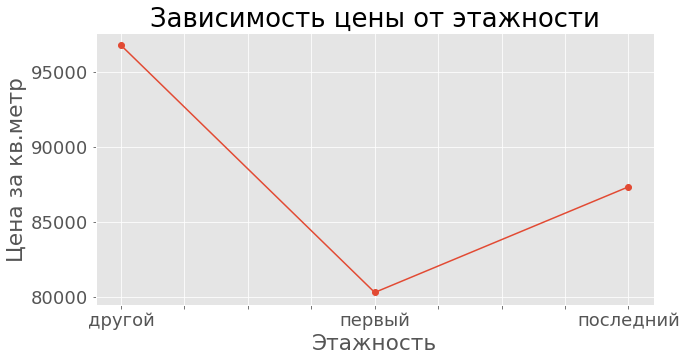

In [68]:
#Построим график зависимости цены от этажа
floor_price_pivot.plot(y='floor_group', x='price_per_square_meter', style='-o', figsize=(10,5), grid=True)
plt.ylabel('Цена за кв.метр') # название оси ординат
plt.xlabel('Этажность') # название оси абцисс
plt.title('Зависимость цены от этажности') # заголовок графика
plt.show()

Изучим зависимость цены от дня недели публикации

In [69]:
#С помощью метода groupby() сгруппируем данные по дню недели и выведем для каждого среднее значение цены
weekday_price = estate_data.groupby('weekday')['price_per_square_meter'].median().round()
weekday_price.reset_index()

,weekday,price_per_square_meter
0,воскресенье,93182.0
1,вторник,94238.0
2,понедельник,93750.0
3,пятница,93252.0
4,среда,94444.0
5,суббота,93082.0
6,четверг,93908.0


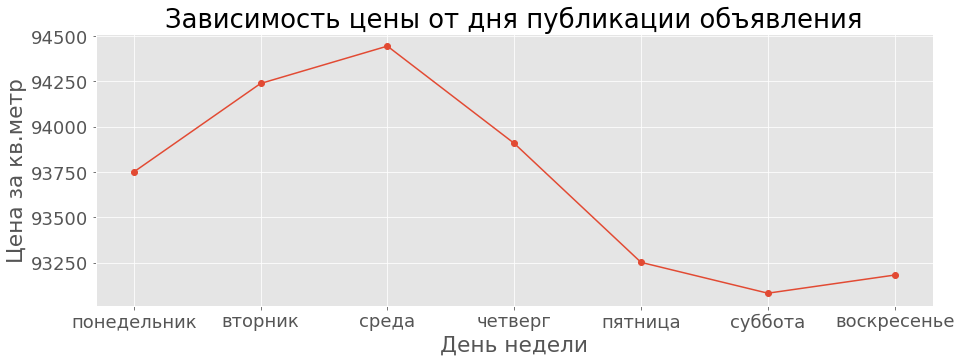

In [70]:
#Отсортируем, чтобы дни недели шли по порядку 
#C помощью метода plot() строим график зависимости цены от дня недели публикации объявления
weekday_price.loc[['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']].plot(
    x='weekday', y='price_per_square_meter', style='-o', grid=True, figsize=(15,5)
)
plt.ylabel('Цена за кв.метр') # название оси ординат
plt.xlabel('День недели') # название оси абцисс
plt.title('Зависимость цены от дня публикации объявления') # заголовок графика
plt.show()

Заметим, что в выходные количество публикаций падает к выходным и снова растет начиная с понедельника, это логично, на рабочей неделе выставляют больше объявлений о продаже.

In [71]:
#С помощью метода groupby() сгруппируем данные по месяцам и выведем для каждого медианное округленное значение цены
month_price = estate_data.groupby('month')['price_per_square_meter'].median().round()
month_price.reset_index()

,month,price_per_square_meter
0,1,94329.0
1,2,93750.0
2,3,94855.0
3,4,92391.0
4,5,92222.0
5,6,91684.0
6,7,93992.0
7,8,95738.0
8,9,94809.0
9,10,93478.0


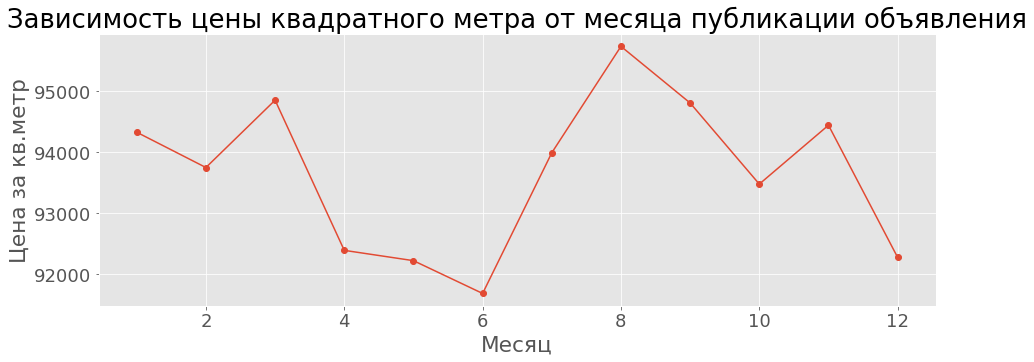

In [72]:
#С помощью метода plot() строим график зависимости цены от месяца публикации объявления
month_price.plot(x='month', y='price_per_square_meter', style='-o', grid=True, figsize=(15,5))
plt.ylabel('Цена за кв.метр') # название оси ординат
plt.xlabel('Месяц') # название оси абцисс
plt.title('Зависимость цены квадратного метра от месяца публикации объявления') # заголовок графика
plt.show()

По графику видим несколько пиков - апрель, август-сентябрь и ноябрь. В апреле вероятно владельцы хотят продать квартиры до лета - сезона отпусков, затишья на рынке недвижимости, в августе-сентябре начинается "новый сезон", растет спрос - растет предложение, растет возможность выгодно продать квартиру в виду высокого спроса. 

In [73]:
#С помощью метода groupby() сгруппируем данные по годам и выведем для каждого значение медианы цены и округлим
year_price = estate_data.groupby('year')['price_per_square_meter'].median().round()
year_price.reset_index()

,year,price_per_square_meter
0,2015,90452.0
1,2016,91379.0
2,2017,91667.0
3,2018,95238.0
4,2019,103125.0


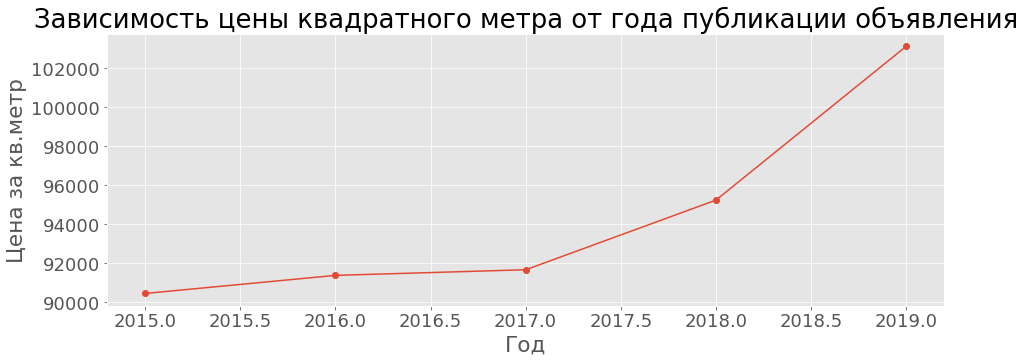

In [74]:
#С помощью метода plot() строим график зависимости цены от года публикации объявления
year_price.plot(x='year', y='price_per_square_meter', style='-o', grid=True, figsize=(15,5))
plt.ylabel('Цена за кв.метр') # название оси ординат
plt.xlabel('Год') # название оси абцисс
plt.title('Зависимость цены квадратного метра от года публикации объявления') # заголовок графика
plt.show()

А вот от года зависимость более ярковыраженная, в течение 2015 года идет небольшое снижение, скорее всего эта тенденция продолжалась после обвала цен в 2014 году, вызванного валютным кризисом. После 2018 года стоимость квадратного метра резко идет вверх, это могло быть вызвано снижением ключевой ставки Центробанка и соответственным снижением процента по ипотеке, увеличения ее доступности и,как следствие, ростом спроса.

### Исследование объявлений по их количеству

Выделим 10 населенных пунктов с наибольшим количеством объявлений.

In [75]:
#С помощью метода groupby() подсчитаем количество объявлений по населенным пунктам
#Выведем первые 10 значений на экран
locality_group = estate_data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)
locality_group.head(10).to_frame().rename(columns={'locality_name': 'count'})

,count
locality_name,
Санкт-Петербург,11561
посёлок Мурино,468
посёлок Шушары,365
Всеволожск,290
Колпино,278
посёлок Парголово,269
деревня Кудрово,261
Пушкин,260
Гатчина,228


In [76]:
#Сохраняем новую таблицу с 10ю первыми локациями по наибольшему числу публикаций объявлений
estate_data_ten = estate_data.query('locality_name in ("Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "Колпино", "посёлок Парголово", "Пушкин", "деревня Кудрово", "Гатчина", "Выборг")')
#Делаем сводную таблицу: для каждого населенного пункта выводим среднее значение цены за квадратный метр
pivot_estate_data_ten = estate_data_ten.pivot_table(
    index='locality_name', values='price_per_square_meter', aggfunc='mean'
)
pivot_estate_data_ten.sort_values(by='price_per_square_meter', ascending=False).reset_index()

,locality_name,price_per_square_meter
0,Санкт-Петербург,108900.139953
1,Пушкин,101640.084615
2,деревня Кудрово,92699.609195
3,посёлок Парголово,89226.026022
4,посёлок Мурино,85936.811966
5,посёлок Шушары,77930.860274
6,Колпино,74682.791367
7,Всеволожск,68990.448276
8,Гатчина,68191.995614
9,Выборг,57196.837989


Заметим, что в областном центре, в Санкт-Петербурге больше всего объявлений и чем ближе к нему расположен населенный пункт - тем больше объявлений.

### Исследование квартир в Санкт-Петербурге
Изучим для каждой квартиры расстояние до центра. Рассмотрим квартиры, находящиеся в Санкт-Петербурге.

In [77]:
#С помощью метода query() создаем срез данных по населенному пункту Санкт-Петербург
estate_data_spb = estate_data.query('locality_name == "Санкт-Петербург"')

Переведем расстояние до центра из метров в километры и добавим в новый столбец.

In [78]:
#Добавляем новый столбец dist_km, вычисляем его значение. Выведем первые 10 строк на экран
estate_data_spb['dist_km'] = (estate_data_spb['cityCenters_nearest'] / 1000).round()
estate_data_spb['dist_km'].head(10)

4      8.0
9     15.0
10    14.0
15    14.0
16    11.0
18    11.0
19    13.0
21    10.0
24     2.0
25    15.0
Name: dist_km, dtype: float64

Построим график зависимости цены от удаленности от центра.

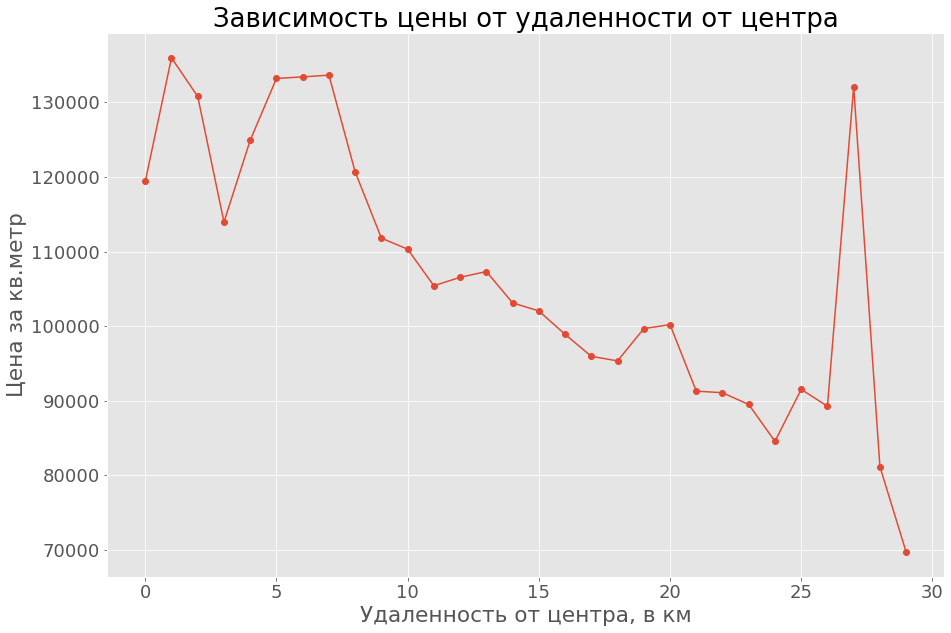

In [79]:
#Группируем данные по расстоянию до центра в км и для каждого км рассчитаем среднее значение цены
#Построим график зависимости цены от удаленности от центра в км
spb_grouped = estate_data_spb.groupby('dist_km')['price_per_square_meter'].mean()
spb_grouped.plot(x='dist_km', y='price_per_square_meter', style='-o', grid=True, figsize=(15,10))
plt.ylabel('Цена за кв.метр') # название оси ординат
plt.xlabel('Удаленность от центра, в км') # название оси абцисс
plt.title('Зависимость цены от удаленности от центра') # заголовок графика
plt.show()

Логично, что чем ближе к центру тем выше цена, но мы видим некоторые выбросы на графике - провал в районе 3го километра и пик после 25го километра от центра, его можно объяснить расположением элитного района, с жильем бизнес-, премиум-класса. Удаленность до 3х километров будем считать центром. Изучим эту территорию подробнее.

### Исследование сегмента квартир в центре
Сделаем срез данных по удаленности от центра и рассмотрим параметры: площадь, число комнат, высоту потолков.

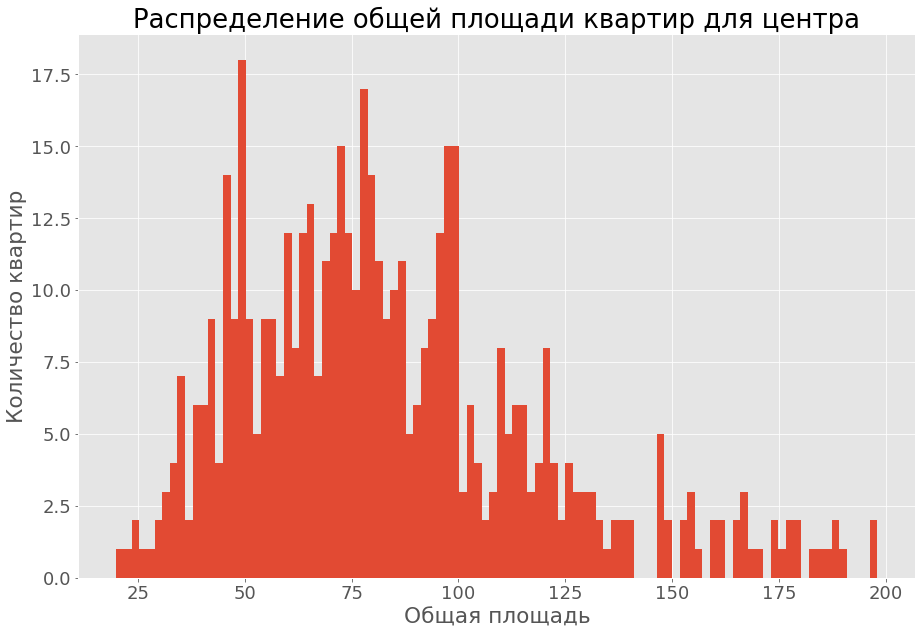

In [80]:
#С помощью метода query() выполняем срез данных по удаленности от центра, убираем все варианты, расположенные дальше 3 км
#Построим гистограмму общей площади квартир для этого среза
estate_data_spb_centr = estate_data_spb.query('dist_km <= 3')
estate_data_spb_centr.hist('total_area', bins=100)
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Общая площадь') # название оси абцисс
plt.title('Распределение общей площади квартир для центра') # заголовок графика
plt.show()

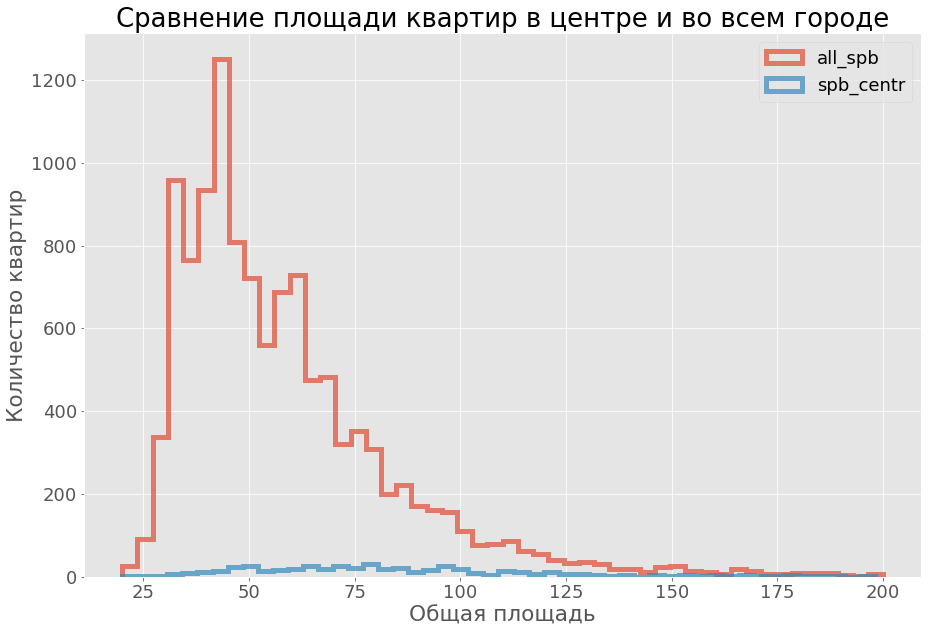

In [81]:
#Напишем функцию для построения двух гистограмм одновременно и будет использовать ее для всех параметров.
#В качестве входного параметра функции будет столбец, по которому будем строить распределение
def two_hist(column):
    ax = estate_data_spb.plot(
        kind='hist',
        y=column,
        histtype='step',
        linewidth=5,
        bins=50,
        alpha=0.7,
        label='all_spb',
    )
    estate_data_spb_centr.plot(
        kind='hist',
        y=column,
        histtype='step',
        linewidth=5,
        bins=50,
        alpha=0.7,
        label='spb_centr',
        ax=ax,
        grid=True,
        legend=True,
    ) 
    
#Применим описанную выше функцию к столбцу с общей площадью
two_hist('total_area')
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Общая площадь') # название оси абцисс
plt.title('Сравнение площади квартир в центре и во всем городе') # заголовок графика
plt.show()

Графики между собой коррелируют по площадям квартир, ожидаемо, что количество квартир в центре города значительно меньше, чем за его пределами.

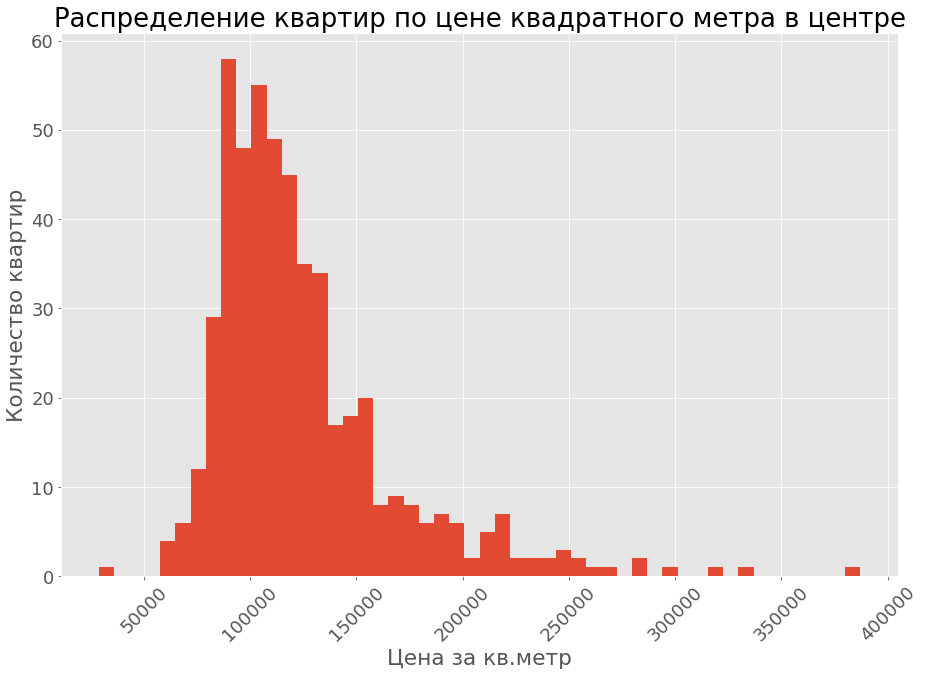

In [82]:
#Строим гистограмму по сцене за квадратный метр для центра города
import matplotlib.pyplot as plt
estate_data_spb_centr.hist('price_per_square_meter', bins=50)
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Цена за кв.метр') # название оси абцисс
plt.title('Распределение квартир по цене квадратного метра в центре') # заголовок графика
plt.xticks(rotation=45)
plt.show()

Отметим, что для центра наиболее характерна цена около 120 000 за квадратный метр.

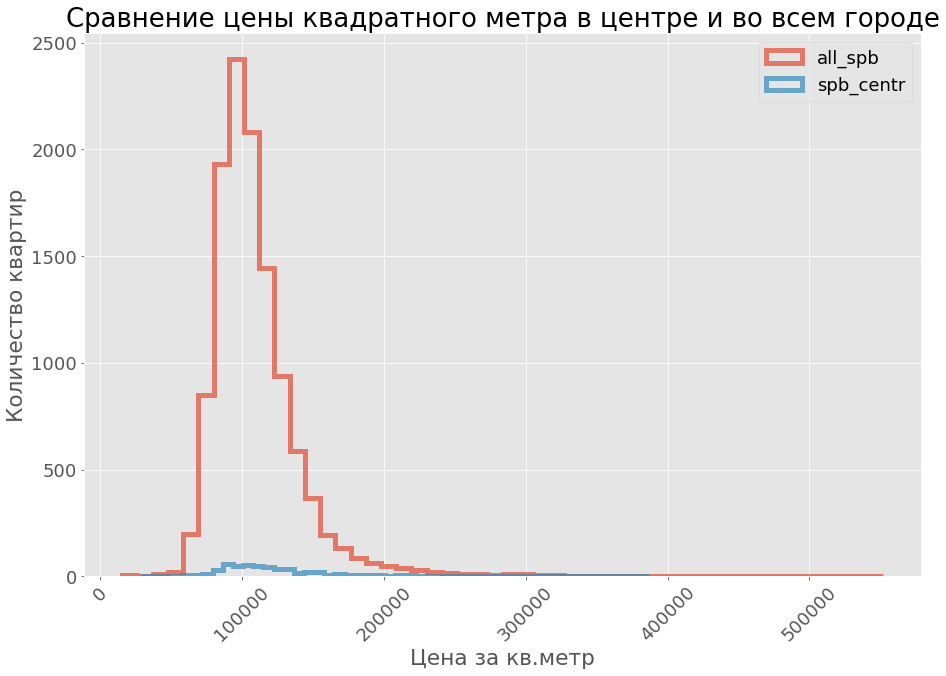

In [83]:
#Построим гистограммы для стоимости квадратного метра для всего Санкт-Петербурга и центра, используя функцию two_hist
two_hist('price_per_square_meter')
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Цена за кв.метр') # название оси абцисс
plt.title('Сравнение цены квадратного метра в центре и во всем городе') # заголовок графика
plt.xticks(rotation=45)
plt.show()

Распределение цены типично как для центра, так и для всего города, за исключением того, что в центре мы видим маленький процент очень высоких цен.

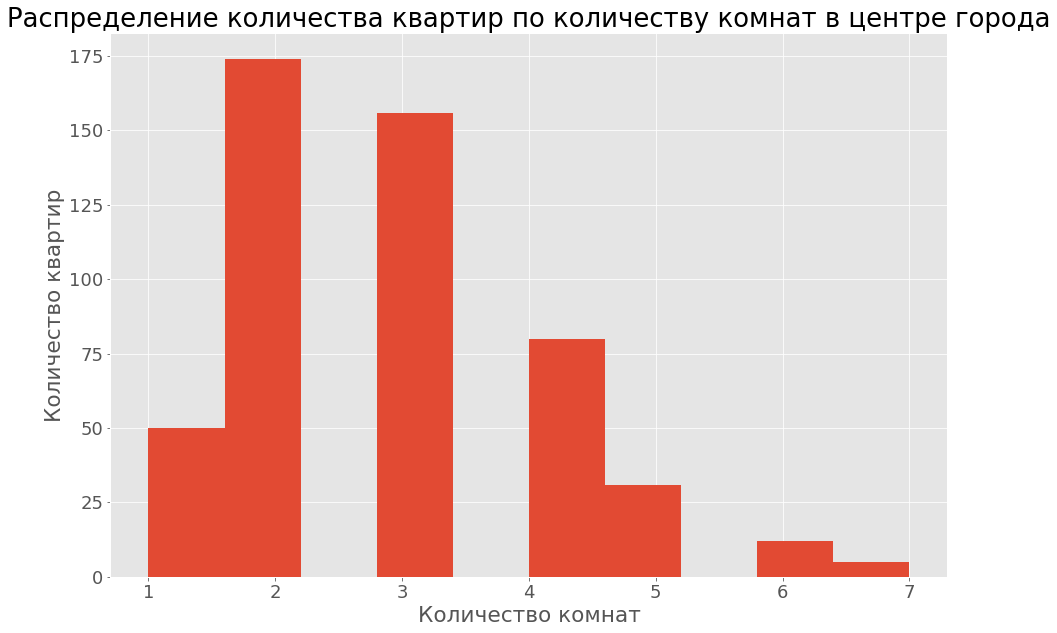

In [84]:
#Строим гистограмму для количества комнат по центру города
estate_data_spb_centr.hist('rooms')
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Количество комнат') # название оси абцисс
plt.title('Распределение количества квартир по количеству комнат в центре города') # заголовок графика
plt.show()

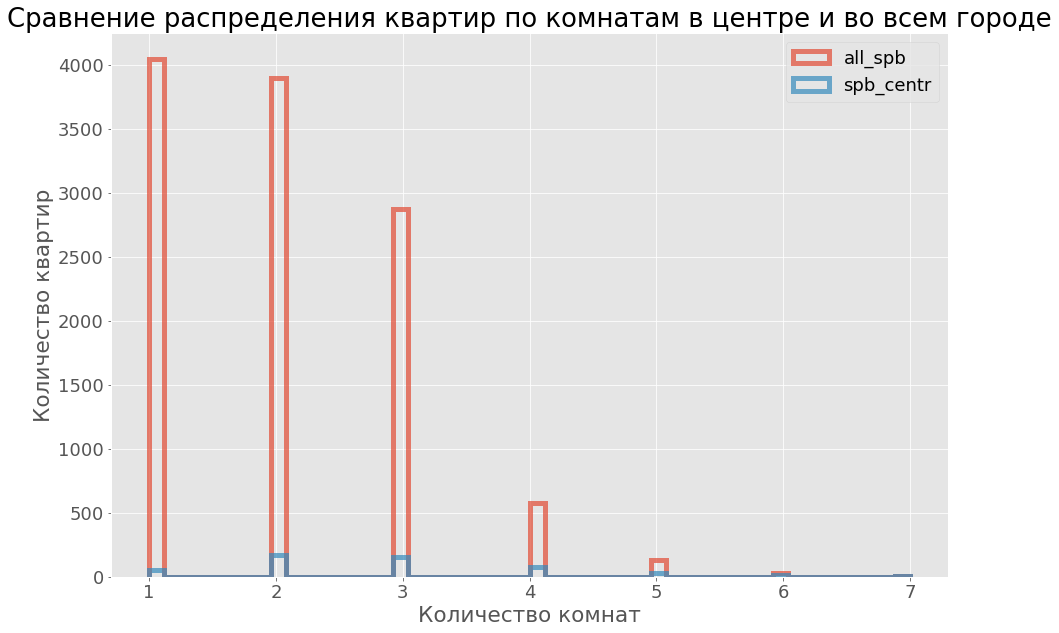

In [85]:
#Построим гистограммы для количества комнат для всего Санкт-Петербурга и центра, используя функцию two_hist
two_hist('rooms')
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Количество комнат') # название оси абцисс
plt.title('Сравнение распределения квартир по комнатам в центре и во всем городе') # заголовок графика
plt.show()

Заметим, что для центра менее характерны однокмонтаные квартиры и студии, чаще встречаются двух- и трехкомнатные квартиры и опять же видим "хвост" из квартир с числом комнат более 7, такое число характерно именно для центра города.

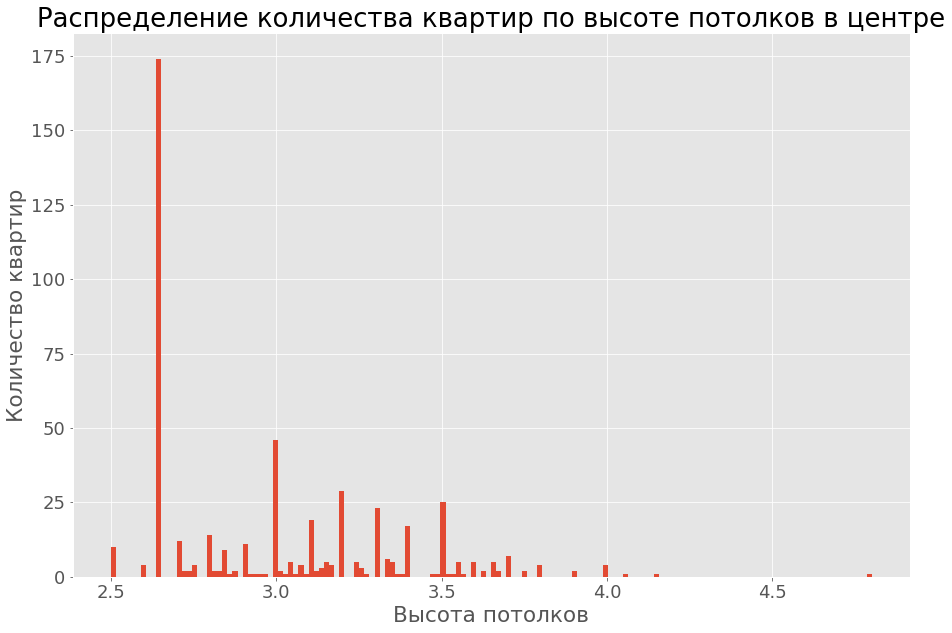

In [86]:
#Строис гистограмму для высоты потолков по центру города
estate_data_spb_centr.hist('ceiling_height', bins=150)
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Высота потолков') # название оси абцисс
plt.title('Распределение количества квартир по высоте потолков в центре') # заголовок графика
plt.show()

В центре города преобладает дореволюционная и сталинская застройка, с 3х метровыми потолками, именно этот пик мы наблюдаем на графике.

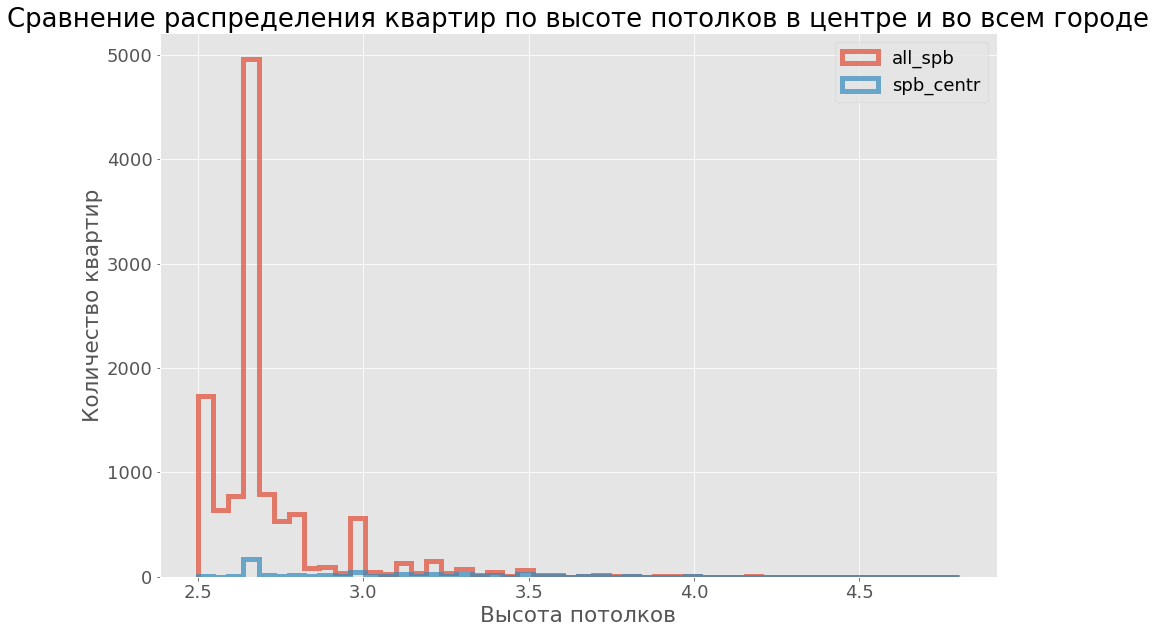

In [87]:
#Построим гистограммы для стоимости высоты потолков для всего Санкт-Петербурга и центра, используя функцию two_hist
two_hist('ceiling_height')
plt.ylabel('Количество квартир') # название оси ординат
plt.xlabel('Высота потолков') # название оси абцисс
plt.title('Сравнение распределения квартир по высоте потолков в центре и во всем городе') # заголовок графика
plt.show()

Здесь так же можно заметить, что в центре преобладает историческая застройка с высокими потолками и реже можно встретить типовое советское жилье с потолками менее 3 метров.

Теперь проанализируем факторы, влияющиее на цену квартиры: число комнат, этаж, удаленность от центра, дата размещения объявления.

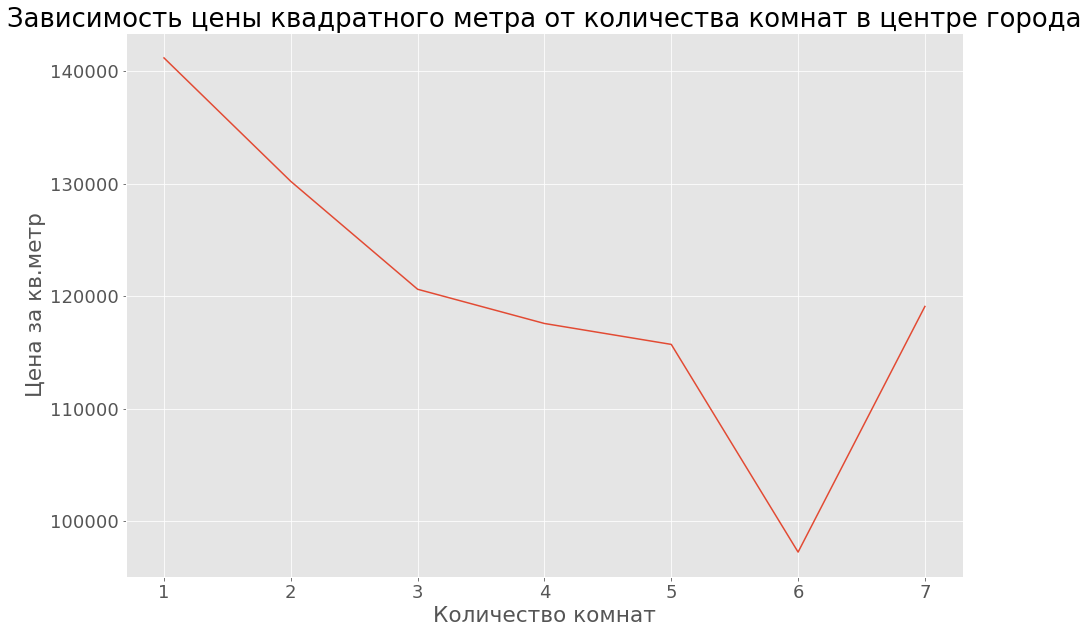

In [88]:
#Сделаем сводную таблицу по числу комнат и соответствующему ему медианному значению цены
rooms_price_spb_pivot = estate_data_spb_centr.groupby('rooms')['price_per_square_meter'].mean()
rooms_price_spb_pivot.plot(x='rooms', y='price_per_quatre_meter', grid=True)
plt.ylabel('Цена за кв.метр') # название оси ординат
plt.xlabel('Количество комнат') # название оси абцисс
plt.title('Зависимость цены квадратного метра от количества комнат в центре города') # заголовок графика
plt.show()

Заметим, что цена однокомнатных квартир немного выше двухкомнатных, это объясняется большей их доступностью и соответствующим большим спросом. До увеличения 5 комнат цена растет, а потом резко падает, возможно это объясняется тем, что 6-7 комнат - это бывшие коммунальные квартиры, в плохом состоянии, с невыселенными жильцами и другими юридическими проблемами, поэтому и цена у них ниже.
Посмотрим зависимость полной стоимости от числа комнат.

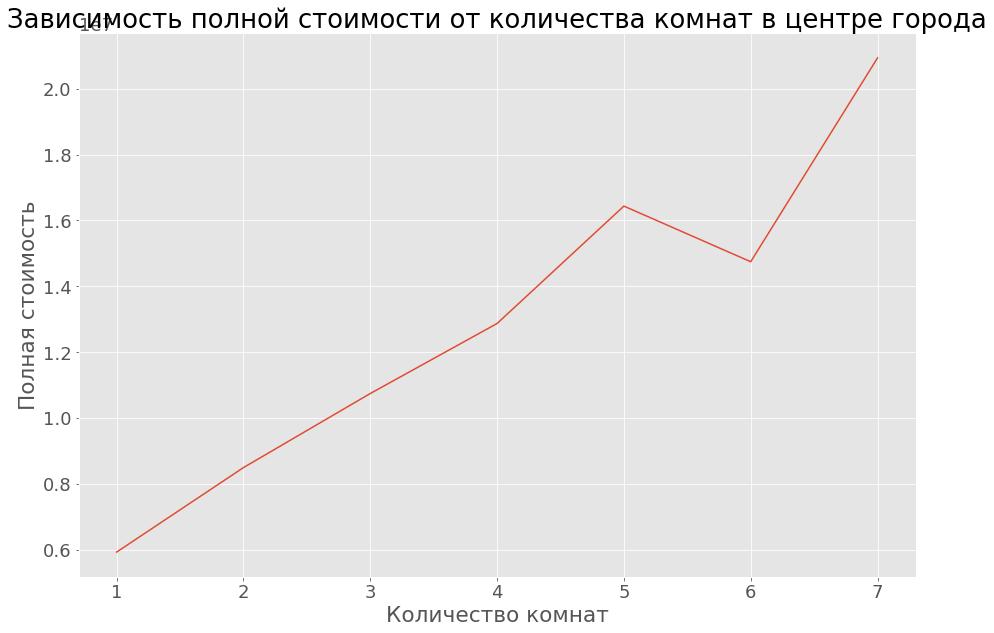

In [89]:
#Сделаем сводную таблицу по числу комнат и соответствующему ему медианному значению цены
rooms_price_spb_pivot = estate_data_spb_centr.groupby('rooms')['last_price'].mean()
rooms_price_spb_pivot.plot(x='rooms', y='last_price', grid=True)
plt.ylabel('Полная стоимость') # название оси ординат
plt.xlabel('Количество комнат') # название оси абцисс
plt.title('Зависимость полной стоимости от количества комнат в центре города') # заголовок графика
plt.show()

Наблюдаем такой же тренд и для общей стоимости, за исключением того, что общая стоимость однущек все же меньше многокомнатных квартир.

Напишем функцию, которая будет строить графики зависимости цены от определенных факторов для центра и для всего Санкт-Петербурга.

In [90]:
#В качестве параметра функции задаем 2 датафрейма и столбец с одинковым названием
#Строим два графика зависимости цены за квадратный метр от указанного параметра

def price_dependence(df1, df2, column):

    plt.subplot(1, 2, 1)

    df1.plot(
        x='column', 
        y='price_per_quatre_meter',
        title='Цена, центр Спб',
        grid=True,   
    )
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)

    df2.plot(
        x='column', 
        y='price_per_quatre_meter',
        title='Цена, весь регион',
        grid=True
    )

    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.rcParams["figure.figsize"] = (15,10) # размеры графика
    plt.show()

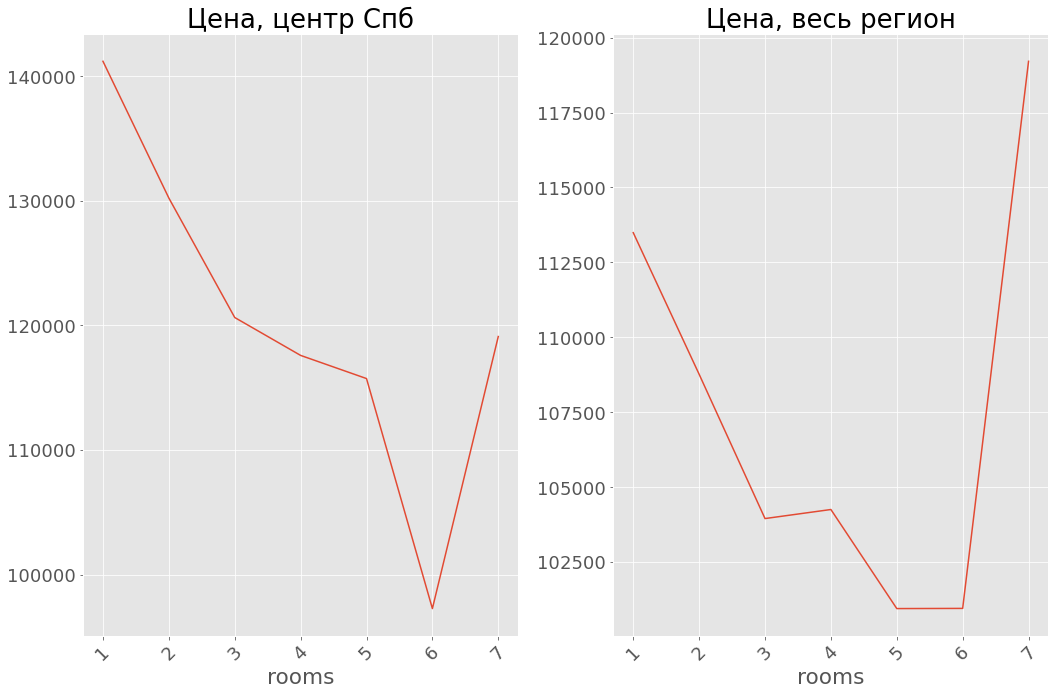

In [91]:
#Сгруппируем данные по столбцу количества комнат для всего Санкт-Петербурга и для его центра
rooms_price_centr_group = estate_data_spb_centr.groupby('rooms')['price_per_square_meter'].mean()
rooms_price_spb_group = estate_data_spb.groupby('rooms')['price_per_square_meter'].mean()
#Вызовем функцию построения графика зависимости цены от параметра количество комнат
price_dependence(rooms_price_centr_group, rooms_price_spb_group, 'rooms')

На графиках видим, что для центра города сохраняется та же тенденция зависимости цены от количества комнат, кроме резкого провала на 6 комнатах, как отмечали ранее, это могут быть коммунальные квартиры в плачевном состоянии или имеющие проблемы с юридической чистотой.

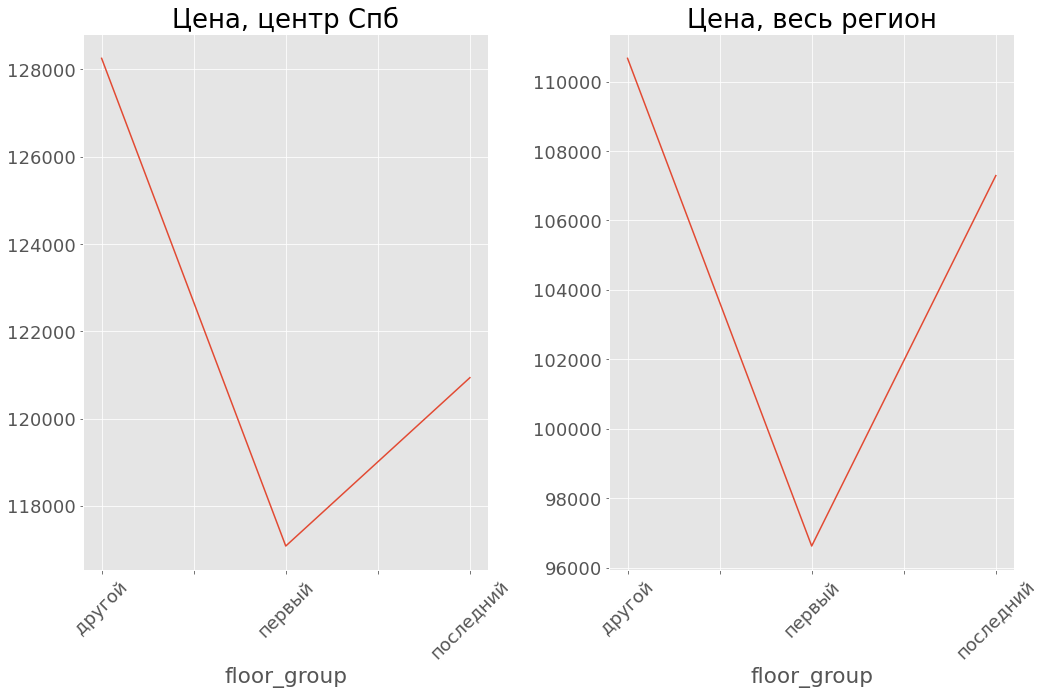

In [92]:
#Сгруппируем данные по столбцу с этажом для всего Санкт-Петербурга и для его центра
floor_price_centr_group = estate_data_spb_centr.groupby('floor_group')['price_per_square_meter'].mean()
floor_price_spb_group = estate_data_spb.groupby('floor_group')['price_per_square_meter'].mean()
#Вызовем функцию построения графика зависимости цены от параметра этаж
price_dependence(floor_price_centr_group, floor_price_spb_group, 'floor_group')

Вне зависимости от территориального положения квартиры на первом этаже стоят значительно дешевле вариантов на других этажах.

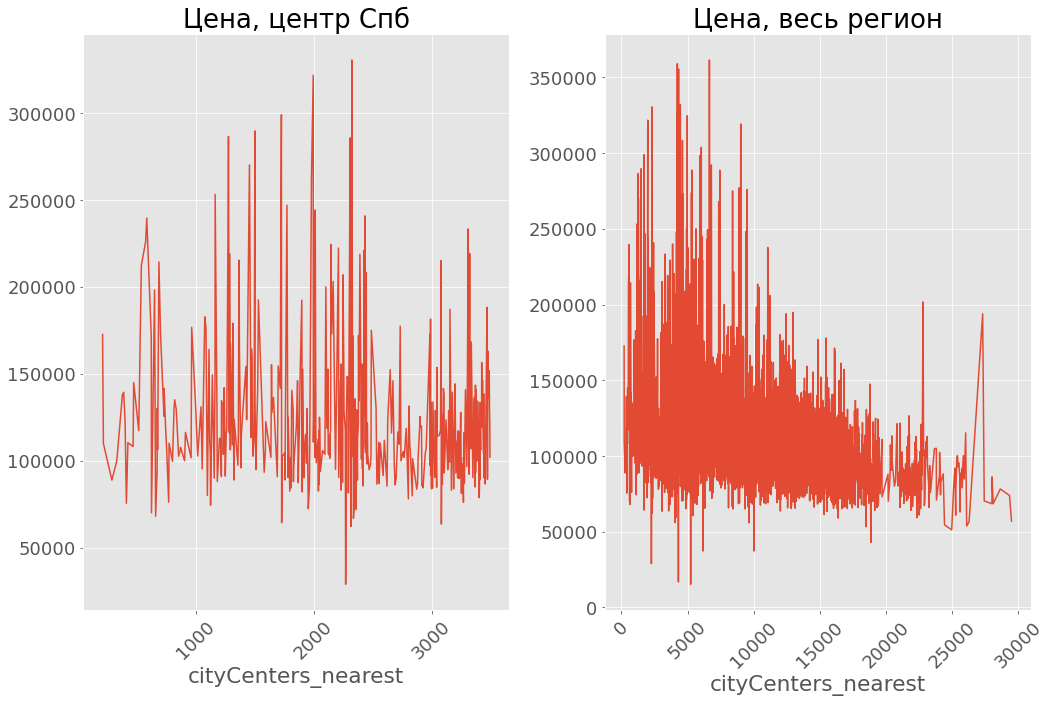

In [93]:
#Сгруппируем данные по столбцу с удаленностью от центра для всего Санкт-Петербурга и для его центра
dist_price_centr_group = estate_data_spb_centr.groupby('cityCenters_nearest')['price_per_square_meter'].mean()
dist_price_spb_group = estate_data_spb.groupby('cityCenters_nearest')['price_per_square_meter'].mean()
#Вызовем функцию построения графика зависимости цены от параметра удаленности от центра
price_dependence(dist_price_centr_group, dist_price_spb_group, 'cityCenters_nearest')

На графиках видимо тот же явный тренд уменьшения цены по мере удаления от центра.

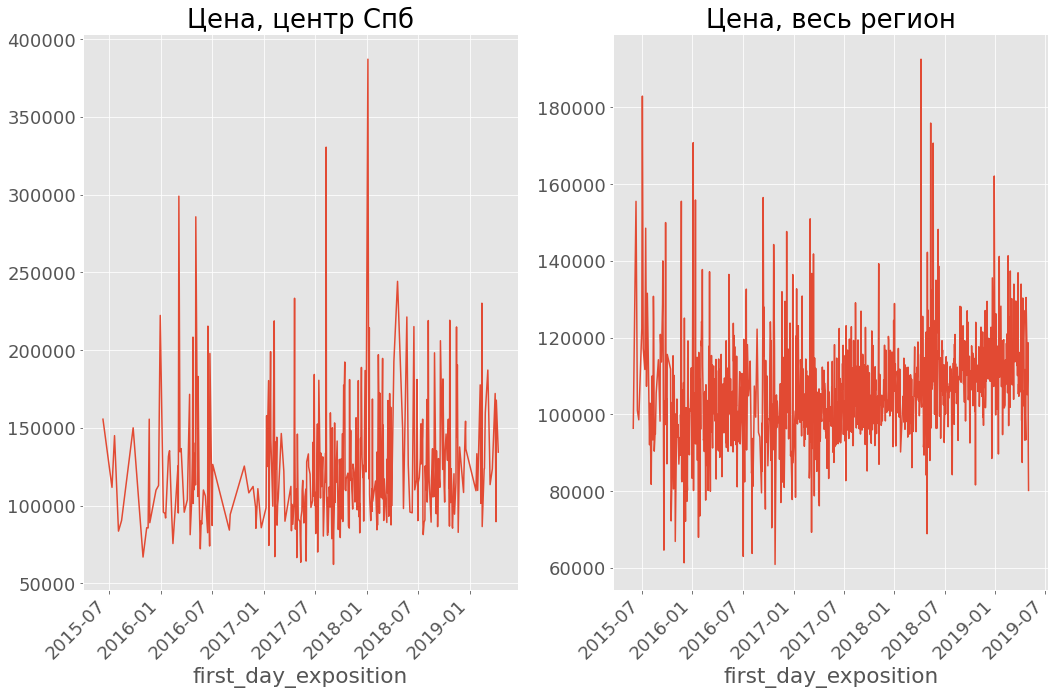

In [94]:
#Сгруппируем данные по столбцу с датой публикации объявления для всего Санкт-Петербурга и для его центра и сделаем срез без выпадающих
#больших значений
date_price_centr_group = estate_data_spb_centr.query('price_per_square_meter <= 400000').groupby(
    'first_day_exposition')['price_per_square_meter'].mean()
date_price_spb_group = estate_data_spb.query('price_per_square_meter <= 200000').groupby(
    'first_day_exposition')['price_per_square_meter'].mean()
#Вызовем функцию построения графика зависимости цены от параметра даты публикации
price_dependence(date_price_centr_group, date_price_spb_group, 'first_day_exposition')

В отличие от центра города, если считать по всему городу, то стоимость квадратного метра из года в год имеет более явный тренд к росту.

Исследуем динамику продаж по дням недели, месяцам и годам.

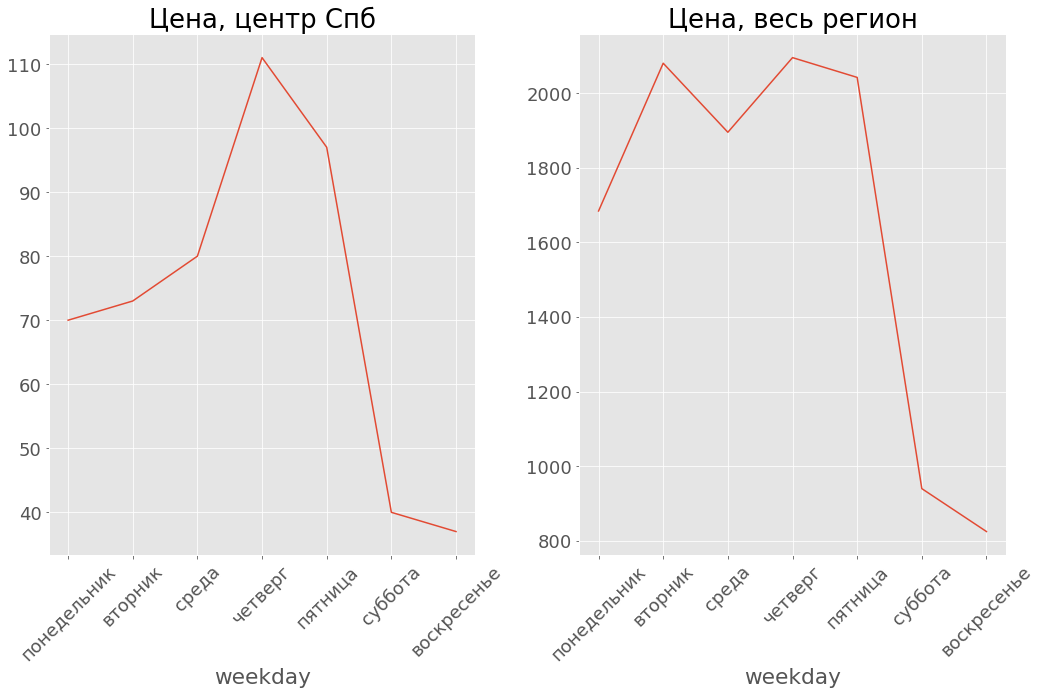

In [95]:
#Сгруппируем данные по столбцу с днем недели публикации для всего Санкт-Петербурга и для его центра и посчитаем количество объявлений
day_price_centr_group = estate_data_spb_centr.groupby('weekday')['weekday'].count()
day_price_spb_group = estate_data_spb.groupby('weekday')['weekday'].count()
#Вызовем функцию построения графиков
price_dependence(day_price_centr_group.loc[['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']],
                 day_price_spb_group.loc[['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']], 
                 'weekday'
                )

Зависимость количества объявлений от дня недели не совсем совпадает для центра и всего города, но в обоих случаях сильное падение между после среды и снова поднимается к выходным.

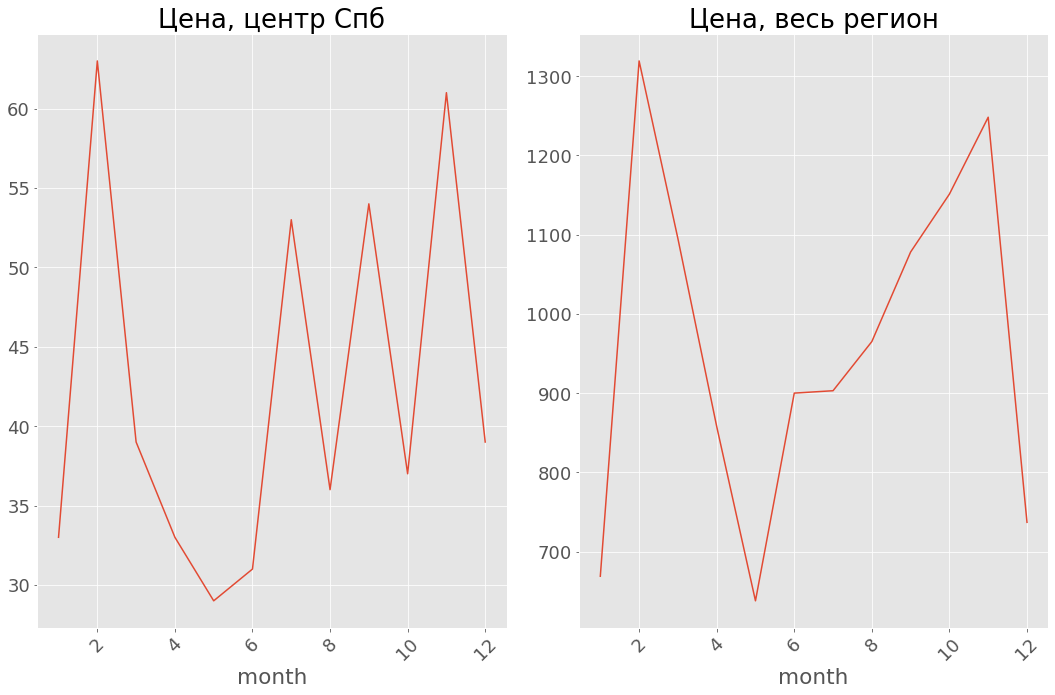

In [96]:
#Сгруппируем данные по столбцу с месяцем публикации для всего Санкт-Петербурга и для его центра и посчитаем количество объявлений
month_price_centr_group = estate_data_spb_centr.groupby('month')['month'].count()
month_price_spb_group = estate_data_spb.groupby('month')['month'].count()
#Вызовем функцию построения графиков
price_dependence(month_price_centr_group, month_price_spb_group, 'month')
plt.show()

Как для центра так и для всего города характрно резкое уменьшение объявлений в мае(праздничные дни), пики в феврале, после новогодних праздников, и в сентябре, когда все возвращаются из отпусков и дач. Отметим, что по всему городу после летнего затишься идет постепенный рост до ноября, в декабре резкий спад - это объяснимо, конец года, праздники - другие заботы, а для центра города наблюдаем уменьшение продаж в августе и в октябре.

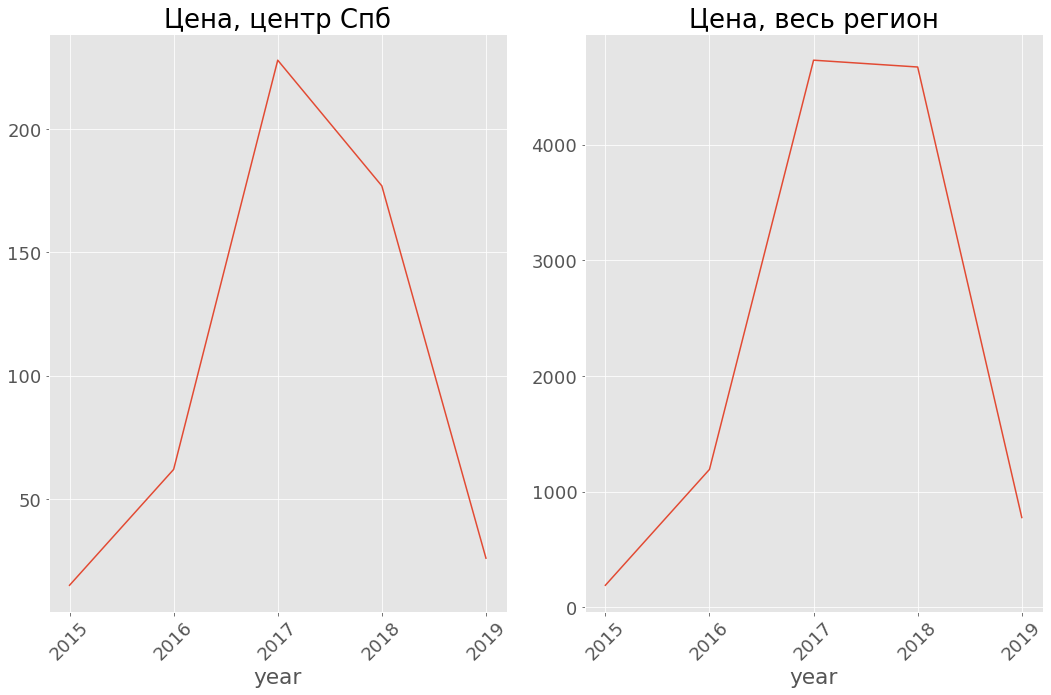

In [97]:
#Сгруппируем данные по столбцу с годом публикации для всего Санкт-Петербурга и для его центра и посчитаем количество объявлений
year_price_centr_group = estate_data_spb_centr.groupby('year')['year'].count()
year_price_spb_group = estate_data_spb.groupby('year')['year'].count()
#Вызовем функцию построения графиков
price_dependence(year_price_centr_group, year_price_spb_group, 'year')

Динамика продаж сохраняется как для всего города так и для центра.

In [98]:
# Для начала, таблица
y1 = estate_data.groupby('year')['last_price'].agg(['count']).rename(columns={'count': 'Весь регион'})
y2 = estate_data_spb_centr.groupby('year')['last_price'].agg(['count']).rename(columns={'count': 'Центр Спб'})

yearbars = pd.concat([y1,y2], axis=1)
yearbars

,Весь регион,Центр Спб
year,,
2015,281,15
2016,1777,62
2017,7005,228
2018,7384,177
2019,1060,26


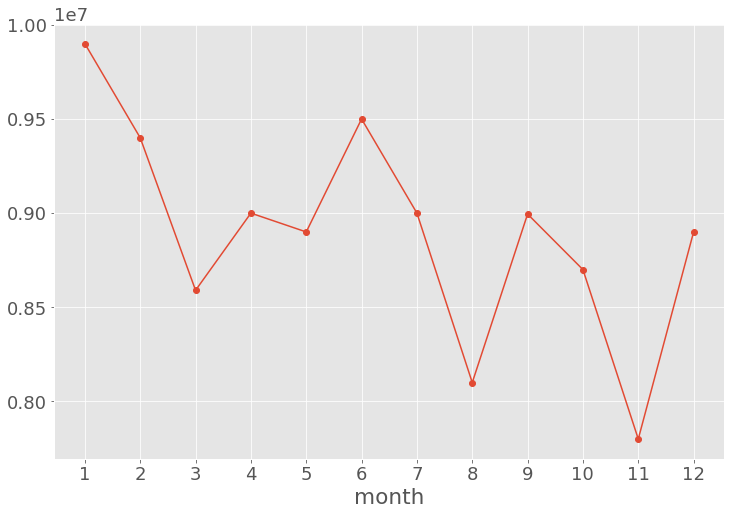

In [99]:
#группируем таблицу по месяцам, считем медианное значение цены для каждого месяца и строим график зависимости цены от месяца
ax = estate_data_spb_centr.groupby('month')['last_price'].agg('median').plot(marker='o', figsize=(12,8))
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.show()

Квадратный метр растет в цене.

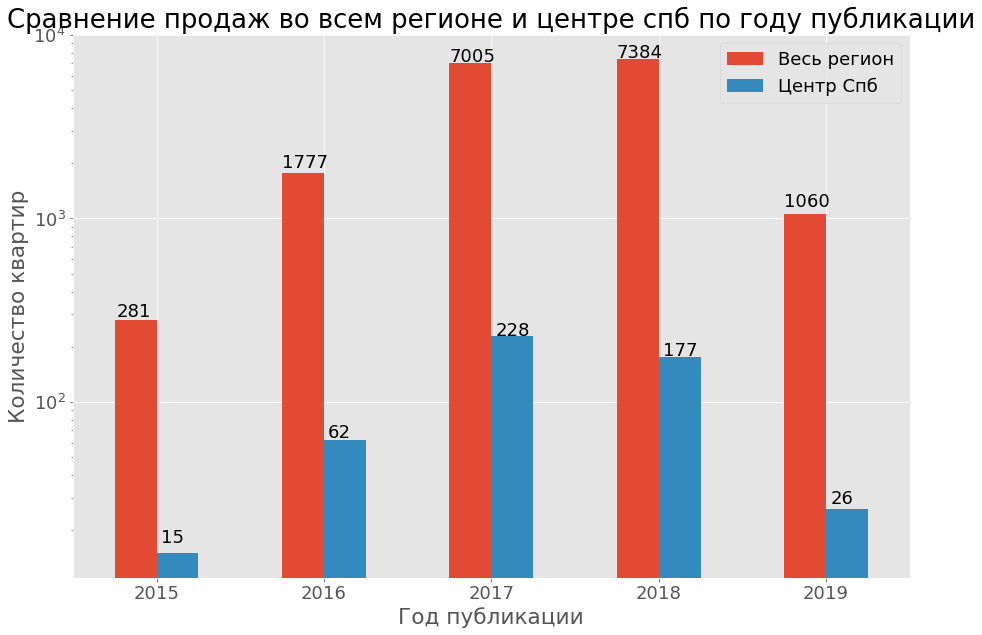

In [100]:
ax = yearbars.plot.bar()

# Перебираем столбцы
k = 1 # счетчик, чтобы отловить столбцы с данными центра

for i in ax.patches:
    
    # Первый столбец     
    if k==1:
        ax.text(i.get_x()+0.01, i.get_height()+10, str((i.get_height())), fontsize=18, color='black')
    
    # Для данных центра, изменим чуть высоту и положение по оси х
    elif k > 5: 
        ax.text(i.get_x()+0.025, i.get_height()+2, str((i.get_height())), fontsize=18, color='black')
     
    # Оставшиеся. Они же со 2-го по 5-й.    
    else:
        ax.text(i.get_x(), i.get_height()+100, str((i.get_height())), fontsize=18, color='black')
    
    k += 1
    
    
ax.set_yscale('log')

plt.ylabel('Количество квартир')
plt.xlabel('Год публикации')
plt.title('Сравнение продаж во всем регионе и центре спб по году публикации')
plt.xticks(rotation=360)
plt.show()

Рассмотрим завимисоть средней полной цены квартиры от года публикации объявления.

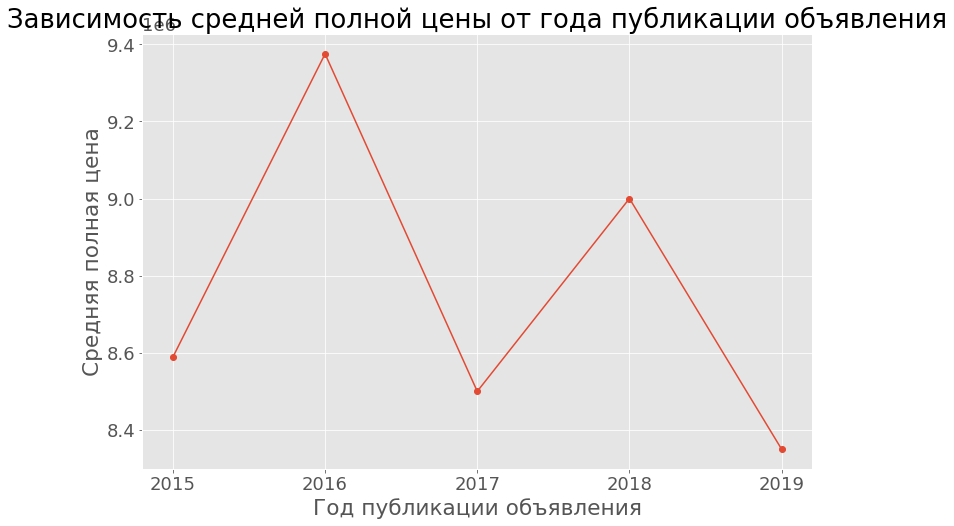

In [101]:
ax = estate_data_spb_centr.groupby('year')['last_price'].agg('median').plot(marker='o', figsize=(12,8))
ax.set_xticks([2015, 2016,2017, 2018, 2019]) # иначе они дробятся

plt.ylabel('Средняя полная цена')
plt.xlabel('Год публикации объявления')
plt.title('Зависимость средней полной цены от года публикации объявления')
plt.show()

Рассмотрим завимисоть средней цены квадратного метра от года публикации объявления.

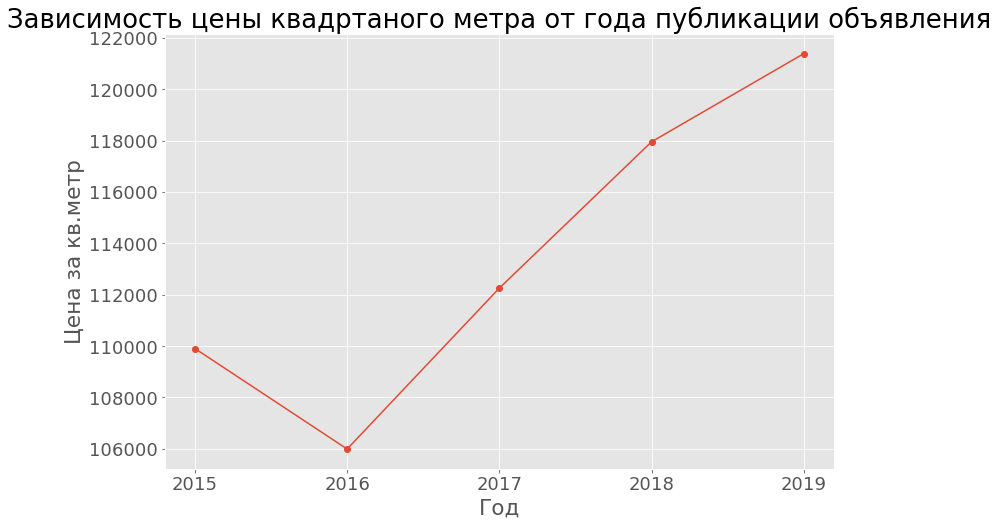

In [102]:
ax = estate_data_spb_centr.groupby('year')['price_per_square_meter'].agg('median').plot(marker='o', figsize=(12,8))
ax.set_xticks([2015, 2016,2017, 2018, 2019]) 
plt.ylabel('Цена за кв.метр')
plt.xlabel('Год')
plt.title('Зависимость цены квадртаного метра от года публикации объявления')
plt.show()

Зависимость цены от месяца снижается летом, когда падает спрос и наступает затишье на рынке недвижимости, растет в сентябре и снижается под конце осени, резкий скачек к декабрю может говорить о том, что люди хотят купить квартиры под новый год и тем самым спрос повышает цену.

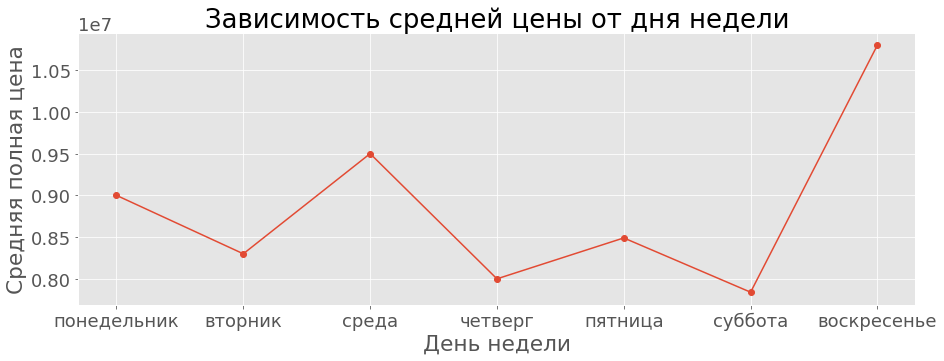

In [103]:
#группируем таблицу по дням недели, считем медианное значение цены для каждого из них и строим график зависимости цены от дня недели
centr_weekday_price = estate_data_spb_centr.groupby('weekday')['last_price'].median()
centr_weekday_price.loc[['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']].plot(
    x='weekday', y='last_price', style='-o', grid=True, figsize=(15,5)
)
plt.ylabel('Средняя полная цена')
plt.xlabel('День недели')
plt.title('Зависимость средней цены от дня недели')
plt.show()

Интересно, что для центра самый больщой пик цены приходится на воскресенье и так же как и для всего города есть пик в среду.

## Общий вывод

Мы провели анализ данных объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах.
- Были обнаружены пропуски, для некоторых значений (наличие балкона, площадь кухни) мы подобрали замену, другие же оставили без изменений(например, наличие парков и прудов).
- Добавили столбцы с новыми данными(цена за квадратный метр; день недели, месяц, год публикации; разбили на группы по этажу), которые в дпльнейшем использовали для анализа.
- Изучили основные параметры и факторы, влияющие на цену квартиры.
- Сравнили тренды зависимости цены для всего Санкт-Петербурга и его центра.

Из проведенного исследования можно сказать следующее:
   - в большинстве своем квартиры продаются за 1,5-2 месяца;
   - стоимость квадратного метра растет с увеличением площади и при приближению к центру города
   - квартиры на первом этаже стоят значительно дешевле других вариантов
   - день недели не влияет на среднюю стоимость квадратного метра, а вот месяц и год вносят свои коррективы
   - больше всего объявлений в областном центре, в Санкт-Петербурге
   - сегмент квартир в центре в основном повторяет тренд остального города зависимости цены от других параметров, отличающимися оказались количество комнат и высота потолков, что объясняется исторической застройкой центра и типовой застройкой окраин

По проведенному исследовательскому анализу предлагаем установить следующие параметры для определения рыночной стоимости объекта недвижимости:
1. Общая площадь
2. Количество комнат
3. Этаж: первый или нет
4. Расстояние до центра города


Основные характеристики для объекта недвижимости:
1. Количество комнат - наиболее частые от 1 до 2
2. Высота потолков - наиболее частные значения - 2.5, 2.64, 2.7, 3 и 3.2 метра
3. Среди населенных кунктов больше всего объявлений в Санкт-Петербурге

Типичная общая цена квартиры для Санкт-Петербурга - 5,2 млн рублей, а для центра города - 8,8 млн рублей.
Типичная площадь для Санктр-Петербурга - 52 квадартных метра, для центра - 78,5 квадратных метра.
Для центра города типична высота потолков 3 метра, вцелом как и для всего Санкт-Петребурга.


Отметим, что осталась не исследованной инфраструктура, привлекательность района, его транспортная доступность, хотя эти факторы второстепенны, но так же могут оказывать влияние на привлекательность покупки, а соответственно и на цену.
